In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import os
from itertools import islice
import re

In [ ]:
product_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\01_Data_Extraction\\Data\\Products", "products_1973.csv")

df_products = pd.read_csv(product_path)

df_products.head()

,Ürün Adı,Kumaş Tipi,Materyal,Kalıp,Kol Boyu,Persona,Kol Tipi,Desen,Yaka Tipi,Renk,...,Sürdürülebilirlik Detayı,Paket İçeriği,Yaş,Sezon,Menşei,Üretici Bilgisi,Ek Özellik,Kapama Şekli,Kalınlık,Kap
0,TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...,Örme,Polyester Karışımlı,Slim,Uzun,Cool & Comfort,Standart Kol,Düz,Kayık Yaka,Siyah,...,Hayır,Tekli,Tüm Yaş Grupları,Kış,TR,DSM Grup Danışmanlık İletişim ve Satış Ticaret...,NaN,NaN,NaN,NaN
1,TRENDYOLMİLLA Siyah Kısa Kol Bodycone/Vücuda O...,Örme,NaN,Slim,Kısa,Fashion Forward,Standart Kol,Düz,Bisiklet Yaka,Siyah,...,NaN,NaN,NaN,NaN,TR,DSM Grup Danışmanlık İletişim ve Satış Ticaret...,NaN,NaN,NaN,NaN
2,TRENDYOLMİLLA Mavi Cep Detaylı Mini Denim Göml...,Denim,Denim,Slim,Uzun,Fashion Forward,Standart Kol,Düz,Gömlek Yaka,Mavi,...,Hayır,NaN,Tüm Yaş Grupları,Tüm Sezonlar,TR,DSM Grup Danışmanlık İletişim ve Satış Ticaret...,Ek Özellik Mevcut Değil,NaN,NaN,NaN
3,TRENDYOLMİLLA Geometrik Desenli Maxi Dokuma Pü...,Dokuma,Dokuma,Regular,Kısa,Cool & Comfort,Standart Kol,Geometrik,Hakim Yaka,Çok Renkli,...,Hayır,NaN,Tüm Yaş Grupları,Yaz,TR,NaN,NaN,NaN,NaN,NaN
4,TRENDYOLMİLLA Siyah Fitted/Vücuda Oturan Askıl...,Örme,Elastan,Slim,Askılı,Fashion Forward,Standart Kol,Düz,Kare Yaka,Siyah,...,Hayır,Tekli,Tüm Yaş Grupları,NaN,TR,DSM Grup Danışmanlık İletişim ve Satış Ticaret...,NaN,NaN,NaN,NaN


In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1971 entries, 0 to 1970
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Ürün Adı                  1971 non-null   object
 1   Kumaş Tipi                1971 non-null   object
 2   Materyal                  1149 non-null   object
 3   Kalıp                     1971 non-null   object
 4   Kol Boyu                  1971 non-null   object
 5   Persona                   1971 non-null   object
 6   Kol Tipi                  1971 non-null   object
 7   Desen                     1971 non-null   object
 8   Yaka Tipi                 1971 non-null   object
 9   Renk                      1971 non-null   object
 10  Ürün Detayı               829 non-null    object
 11  Cep                       874 non-null    object
 12  Koleksiyon                656 non-null    object
 13  Astar Durumu              1801 non-null   object
 14  Boy                     

In [ ]:
df_products.columns

Index(['Ürün Adı', 'Kumaş Tipi', 'Materyal', 'Kalıp', 'Kol Boyu', 'Persona',
       'Kol Tipi', 'Desen', 'Yaka Tipi', 'Renk', 'Ürün Detayı', 'Cep',
       'Koleksiyon', 'Astar Durumu', 'Boy', 'Siluet', 'Ortam', 'Dokuma Tipi',
       'Baskı/Nakış Tekniği', 'Kemer/Kuşak Durumu', 'Sürdürülebilirlik Detayı',
       'Paket İçeriği', 'Yaş', 'Sezon', 'Menşei', 'Üretici Bilgisi',
       'Ek Özellik', 'Kapama Şekli', 'Kalınlık', 'Kap'],
      dtype='object')

In [ ]:
df_products["Ürün Adı"].unique

<bound method Series.unique of 0       TRENDYOLMİLLA Siyah Düz Dokulu Fitted/Vücuda O...
1       TRENDYOLMİLLA Siyah Kısa Kol Bodycone/Vücuda O...
2       TRENDYOLMİLLA Mavi Cep Detaylı Mini Denim Göml...
3       TRENDYOLMİLLA Geometrik Desenli Maxi Dokuma Pü...
4       TRENDYOLMİLLA Siyah Fitted/Vücuda Oturan Askıl...
                              ...                        
1966    TRENDYOLMİLLA Siyah A-Kesim Straplez Dokuma Kı...
1967    TRENDYOLMİLLA Mavi Çiçek Desenli Eteği Belden ...
1968    Trendyol Curve Siyah Düğme Detaylı Yırtmaçlı F...
1969    Trendyol Curve Pembe Çiçek Desenli A-line Örme...
1970    TRENDYOLMİLLA Siyah Vücuda Oturan Payet Detayl...
Name: Ürün Adı, Length: 1971, dtype: object>

In [ ]:
df_products = df_products.drop_duplicates(subset="Ürün Adı",keep="first").reset_index(drop=True)
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963 entries, 0 to 1962
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Ürün Adı                  1963 non-null   object
 1   Kumaş Tipi                1963 non-null   object
 2   Materyal                  1144 non-null   object
 3   Kalıp                     1963 non-null   object
 4   Kol Boyu                  1963 non-null   object
 5   Persona                   1963 non-null   object
 6   Kol Tipi                  1963 non-null   object
 7   Desen                     1963 non-null   object
 8   Yaka Tipi                 1963 non-null   object
 9   Renk                      1963 non-null   object
 10  Ürün Detayı               828 non-null    object
 11  Cep                       869 non-null    object
 12  Koleksiyon                652 non-null    object
 13  Astar Durumu              1795 non-null   object
 14  Boy                     

In [ ]:
pd.set_option('display.max_colwidth', None) 
pd.set_option('display.max_rows', None)  
pd.set_option('display.max_columns', None) 

In [ ]:
unique_counts = df_products.nunique() 
unique_values = {col: df_products[col].dropna().unique().tolist() for col in df_products.columns}

unique_df = pd.DataFrame({'Unique Değer Sayısı': unique_counts, 'Değerler': unique_values})
unique_df[1:]

,Unique Değer Sayısı,Değerler
Kumaş Tipi,5,"[Örme, Denim, Dokuma, Triko, Suni Deri]"
Materyal,25,"[Polyester Karışımlı, Denim, Dokuma, Elastan, Polyester, %100 Pamuk, Viskoz Karışımlı, Pamuklu, Örme, Akrilik, Triko, Tül, Poliamid Karışımlı, Polyester - Elastan, Pamuk - Elastan, Pamuk Polyester, Keten Görünümlü, Poliüretan, Şifon, Saten, Rigid, Viskon, Keten Karışımlı, Pamuk - Polyester - Elastan, Keten]"
Kalıp,5,"[Slim, Regular, Relaxed, Fitted, Oversize]"
Kol Boyu,7,"[Uzun, Kısa, Askılı, Kolsuz, Truvakar Kol, Askısız, İspanyol Kol]"
Persona,8,"[Cool & Comfort, Fashion Forward, Office, Smart, Feminine, Smart/Office, Young, Sexy]"
Kol Tipi,12,"[Standart Kol, Ay Kol, Balon Kol, Büzgülü/Fırfırlı Kol, Düşük Kol, Mendil Kol, Yarasa Kol, Tek Kol, İnce Askılı, Reglan Kol, Kalın Askılı, İspanyol Kol]"
Desen,22,"[Düz, Geometrik, Çizgili, Çiçekli, Soyut, Ekose / Kareli, Batik, Animal, Etnik, Degrade, Puantiyeli, Renk Bloklu, Şal Desen, Ajurlu, Dokulu, Saç Örgü, Baskılı, Baklava, Kazayağı, Tropikal, Retro, Slogan]"
Yaka Tipi,25,"[Kayık Yaka, Bisiklet Yaka, Gömlek Yaka, Hakim Yaka, Kare Yaka, Ceket Yaka, Carmen Yaka, Polo Yaka, Asimetrik Yaka, V Yaka, Dik Yaka, Halter Yaka, Kalp Yaka, Degaje Yaka, Kruvaze, Straplez, Boyundan Bağlamalı, Havuz Yaka, Bebe Yaka, U Yaka, Düğmeli Yaka, Balıkçı Yaka, Fermuarlı Yaka, Choker Yaka, Tek Omuz]"
Renk,20,"[Siyah, Mavi, Çok Renkli, Pembe, Lacivert, Yeşil, Ekru, Beyaz, Kahverengi, Mor, Bordo, Kırmızı, Haki, Sarı, Bej, Altın, Gri, Turuncu, Gümüş, Turkuaz]"
Ürün Detayı,51,"[Sırt Dekolteli, Düğmeli, İncili, Lastikli, Yırtmaçlı, Cut outlı, Fırfırlı, Yarım Patlı, Nakışlı, Gipeli, Dantel Detaylı, Cep Detaylı, Bağlama Detaylı, Taş Aksesuar, Büzgülü, Dokuma Detaylı, Büzgü / Drape, Parıltılı, Fermuar, Cut Out / Volan, Kemerli, Vatkalı, Fiyonklu, Piliseli, Taş Baskı, Dantel, Volanlı / Fırfırlı, Kuşaklı, Aksesuar Detaylı, Astarlı, Çıtçıtlı, Balon Etek, Çiçek Aplike, Brodeli, Sırt Baskılı, Payet, Fularlı, Gül Detaylı, Agraflı, Şeritli, Örme Detaylı, Parlak Taşlı, Eskitme/Soluk Efektli, Göğüsten Bağlama, Aplike, Nervürlü, Pelerinli, Otriş, Birden Fazla Cut-Out, Püskül, Biyeli]"


In [ ]:
unique_df[unique_df["Unique Değer Sayısı"]==1]

,Unique Değer Sayısı,Değerler
Menşei,1,[TR]
Üretici Bilgisi,1,[DSM Grup Danışmanlık İletişim ve Satış Ticaret A.Ş.]
Kap,1,[Kaplı]


C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


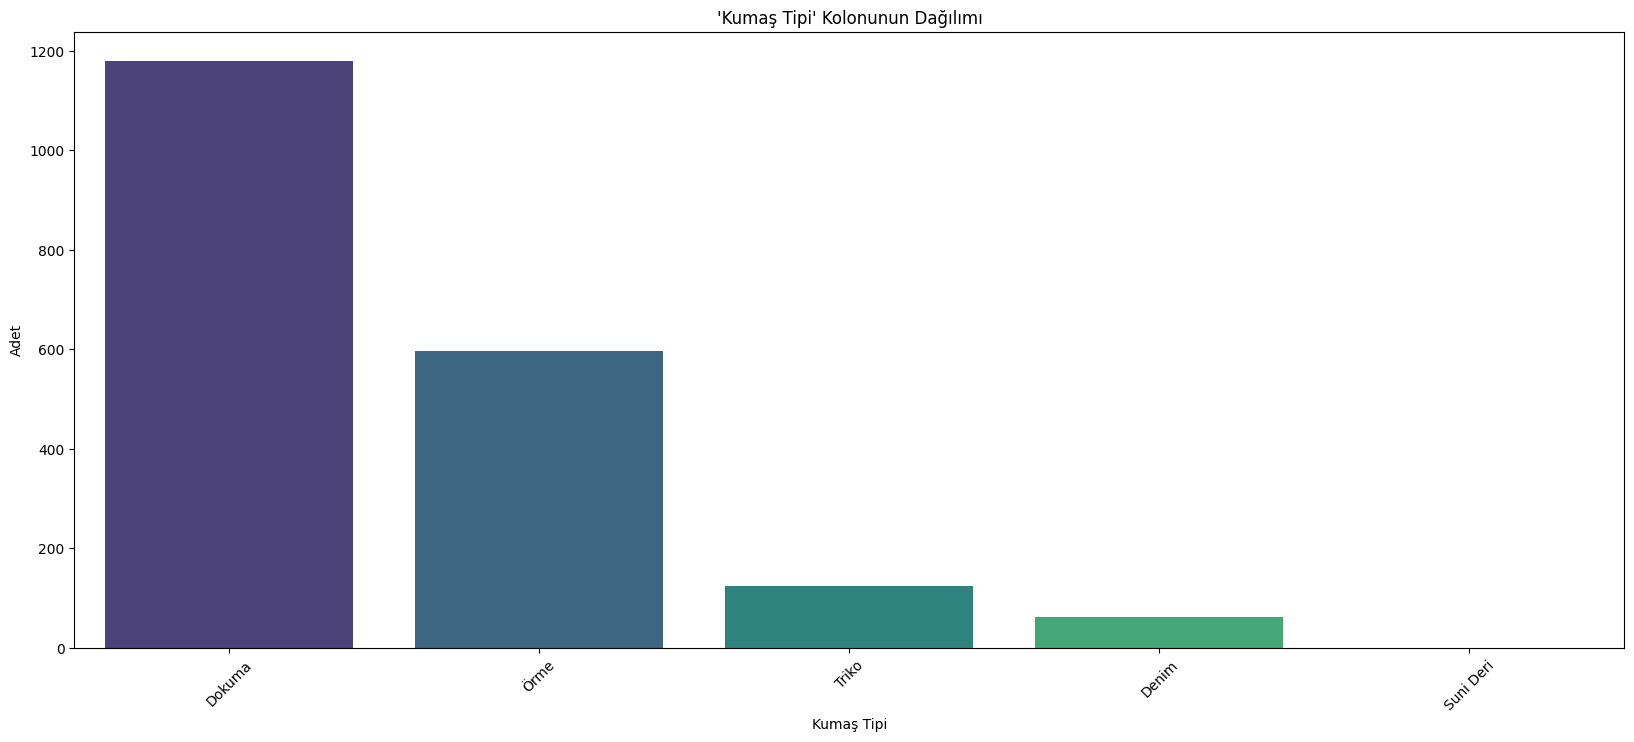

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


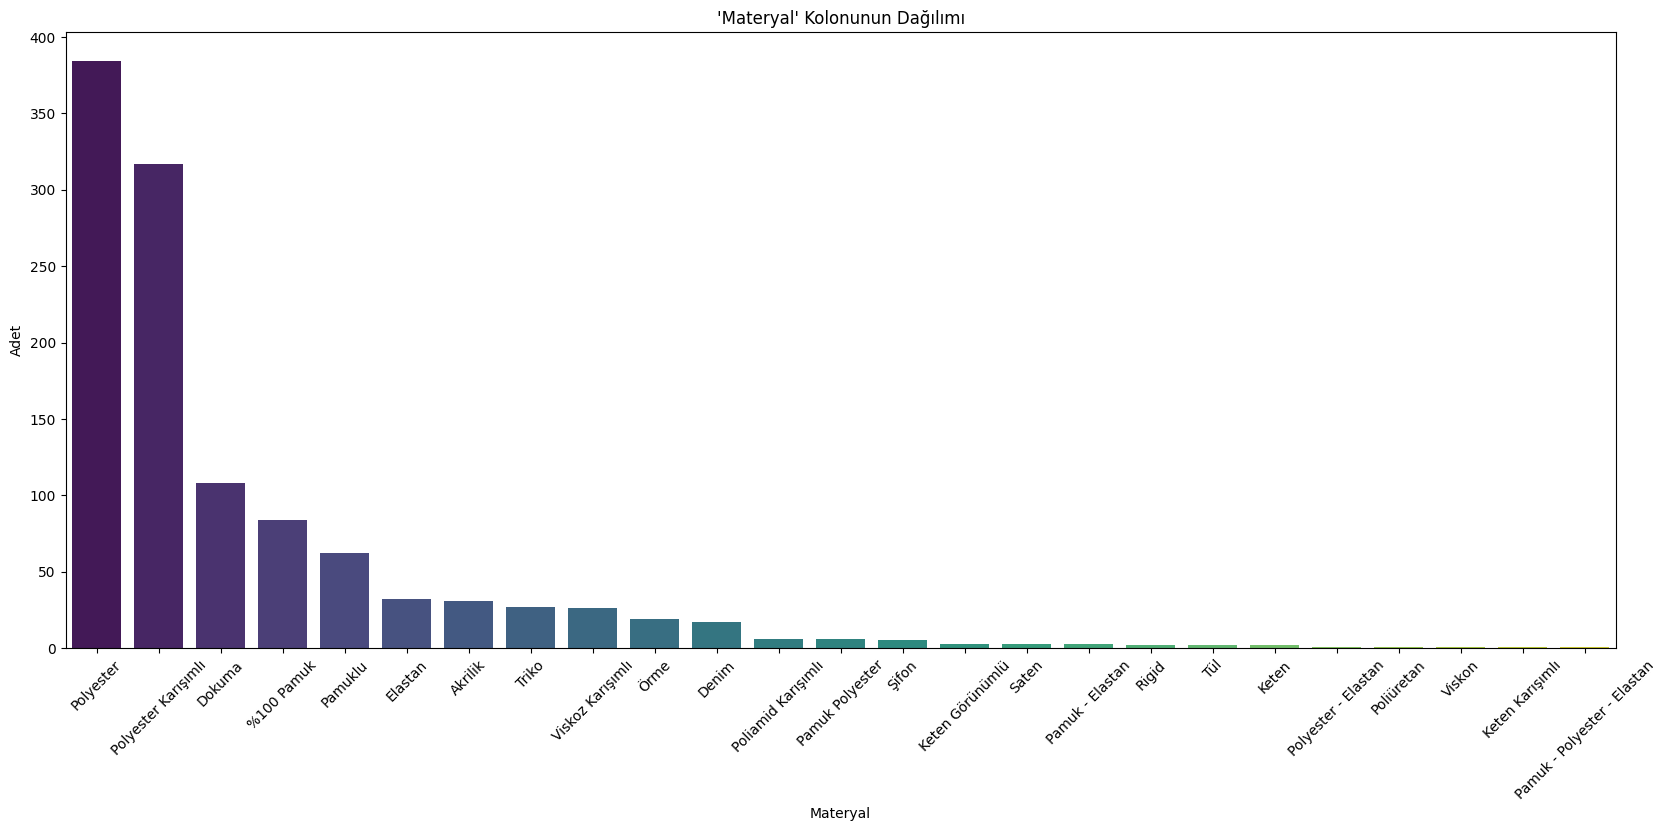

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


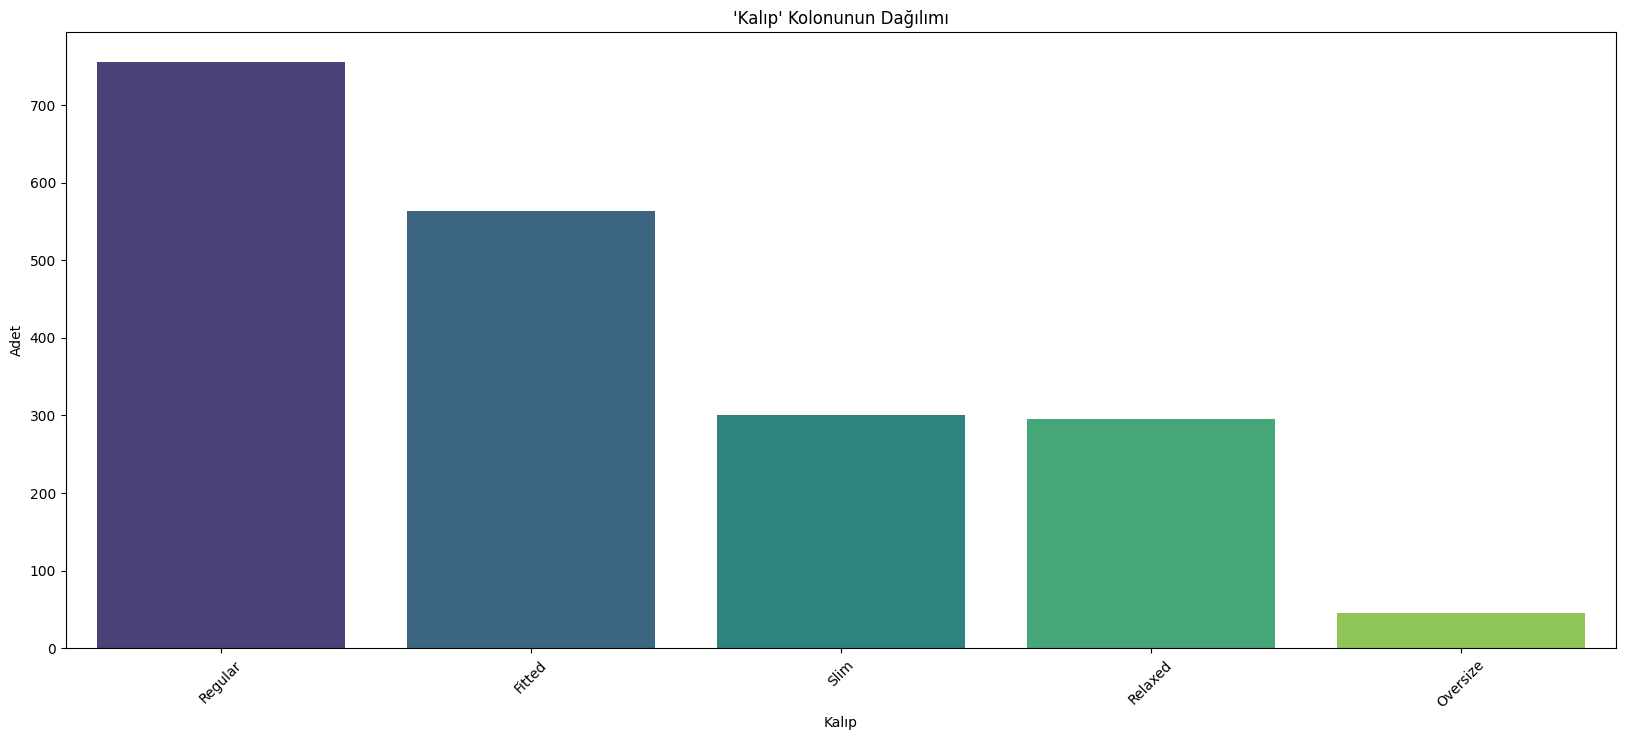

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


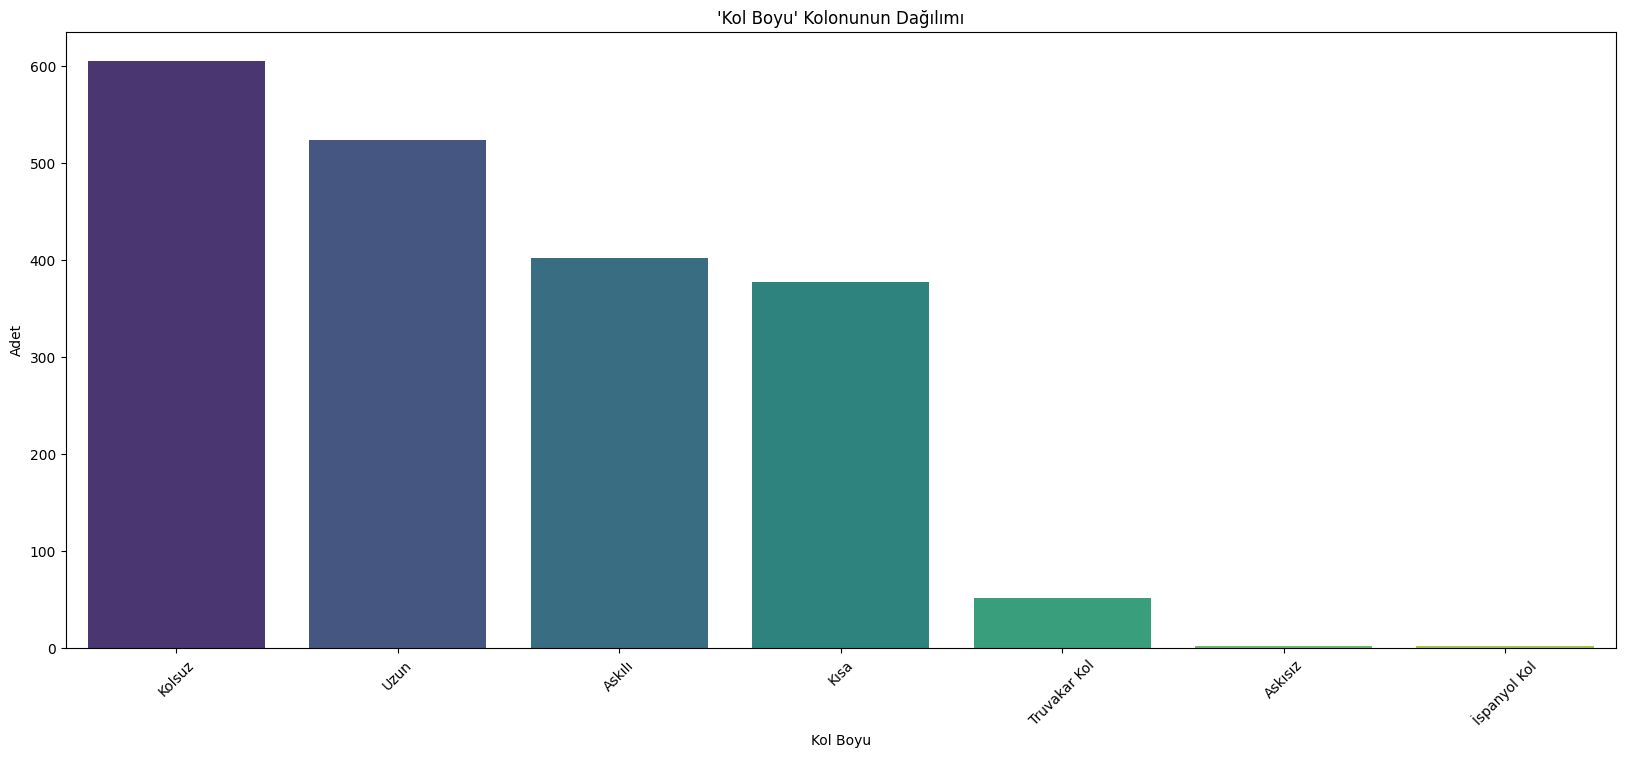

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


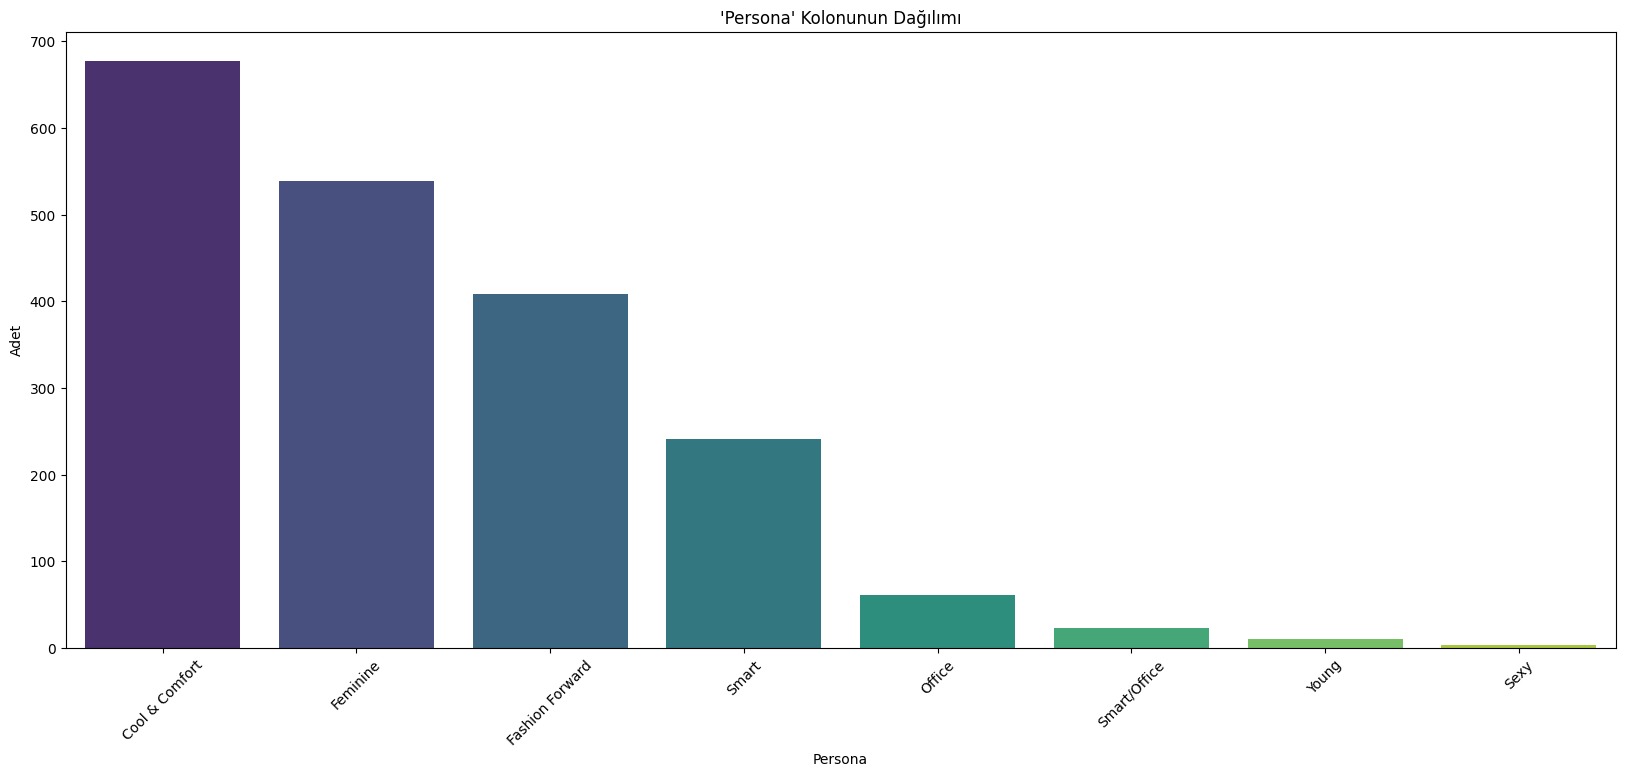

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


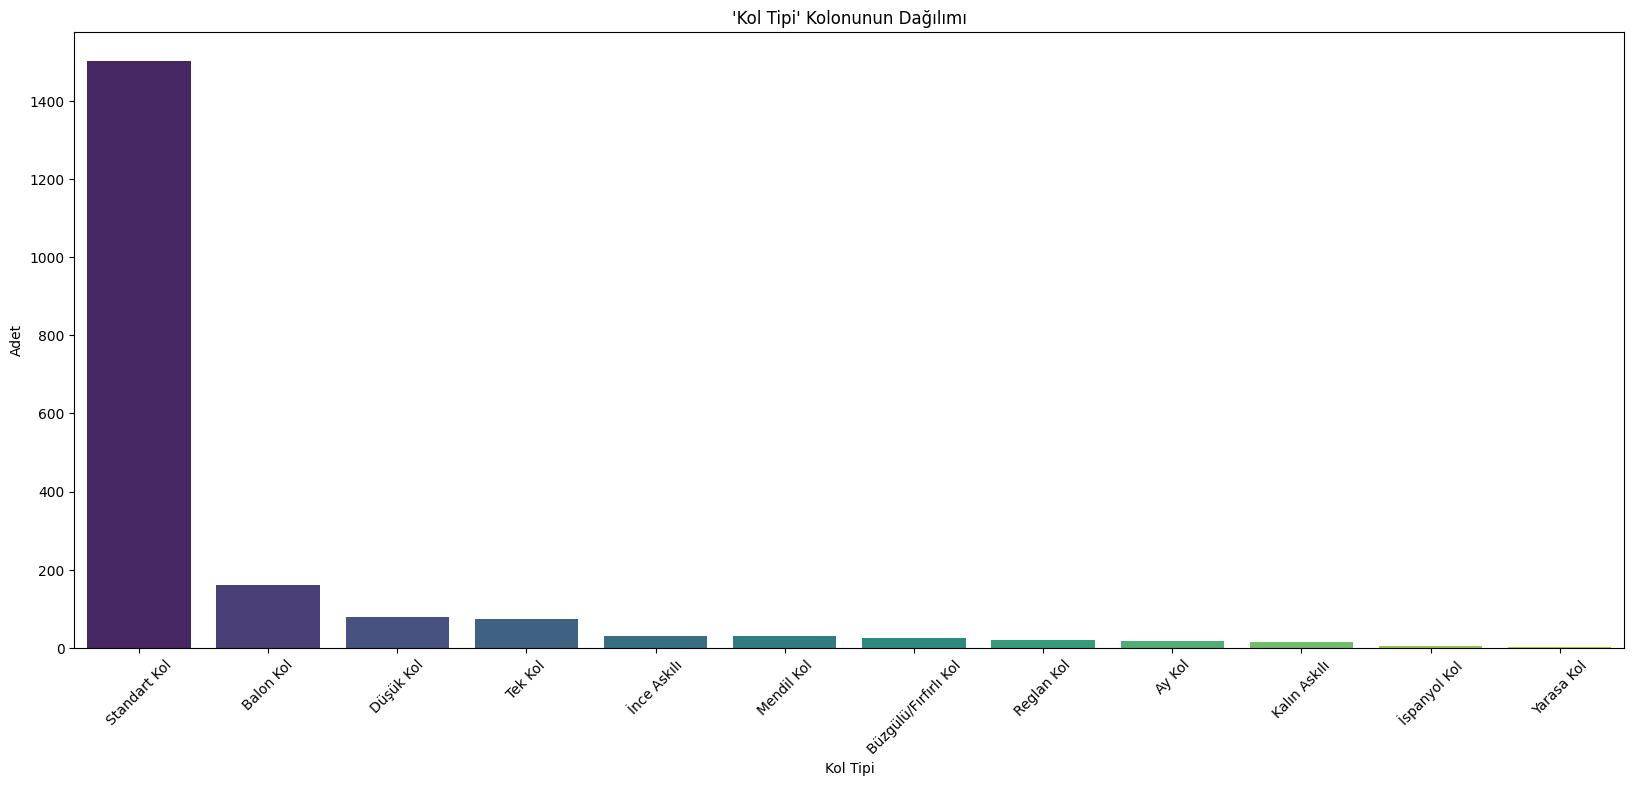

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


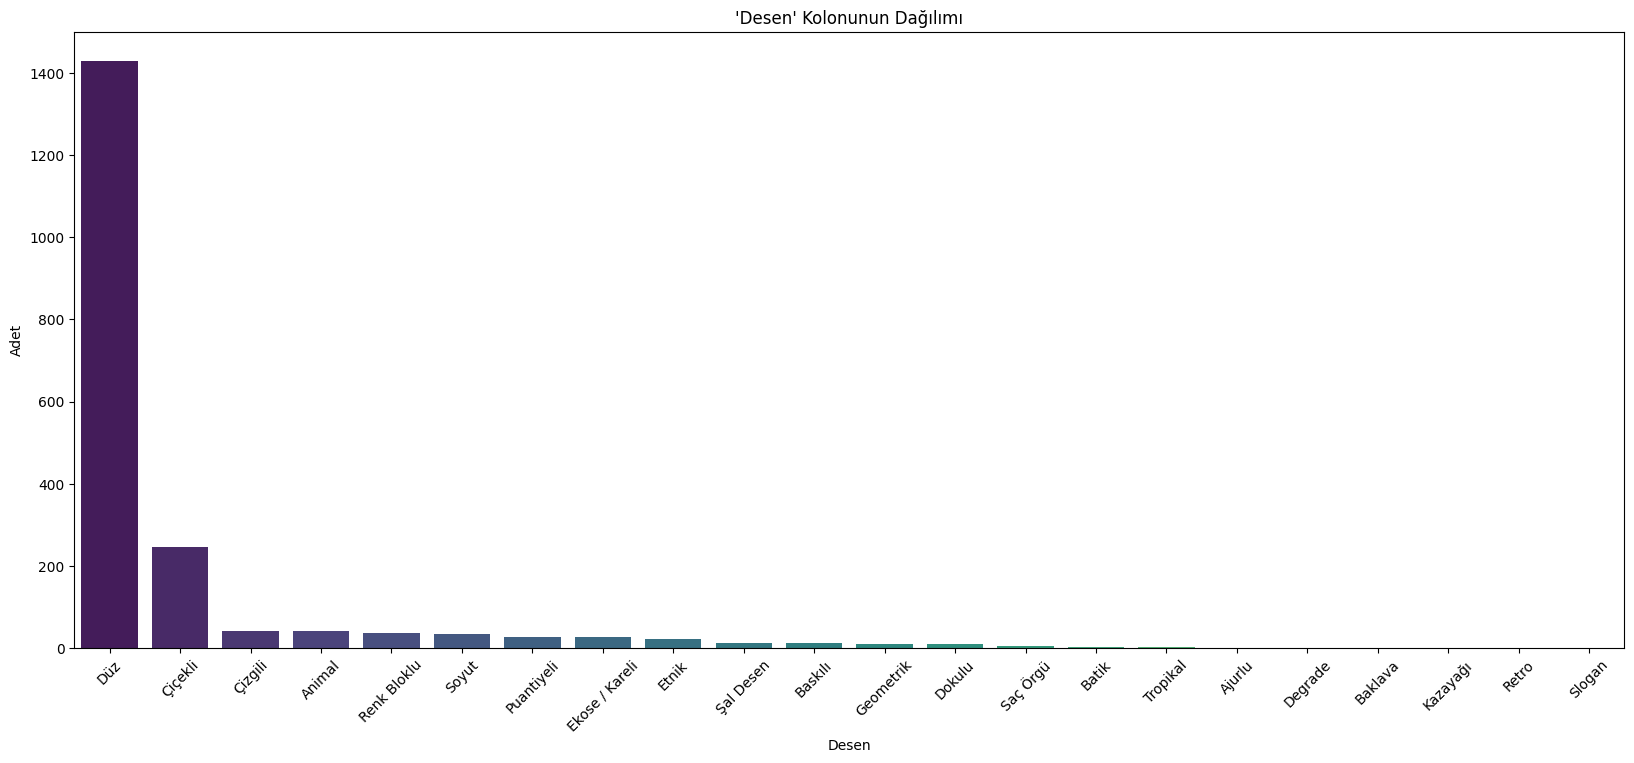

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


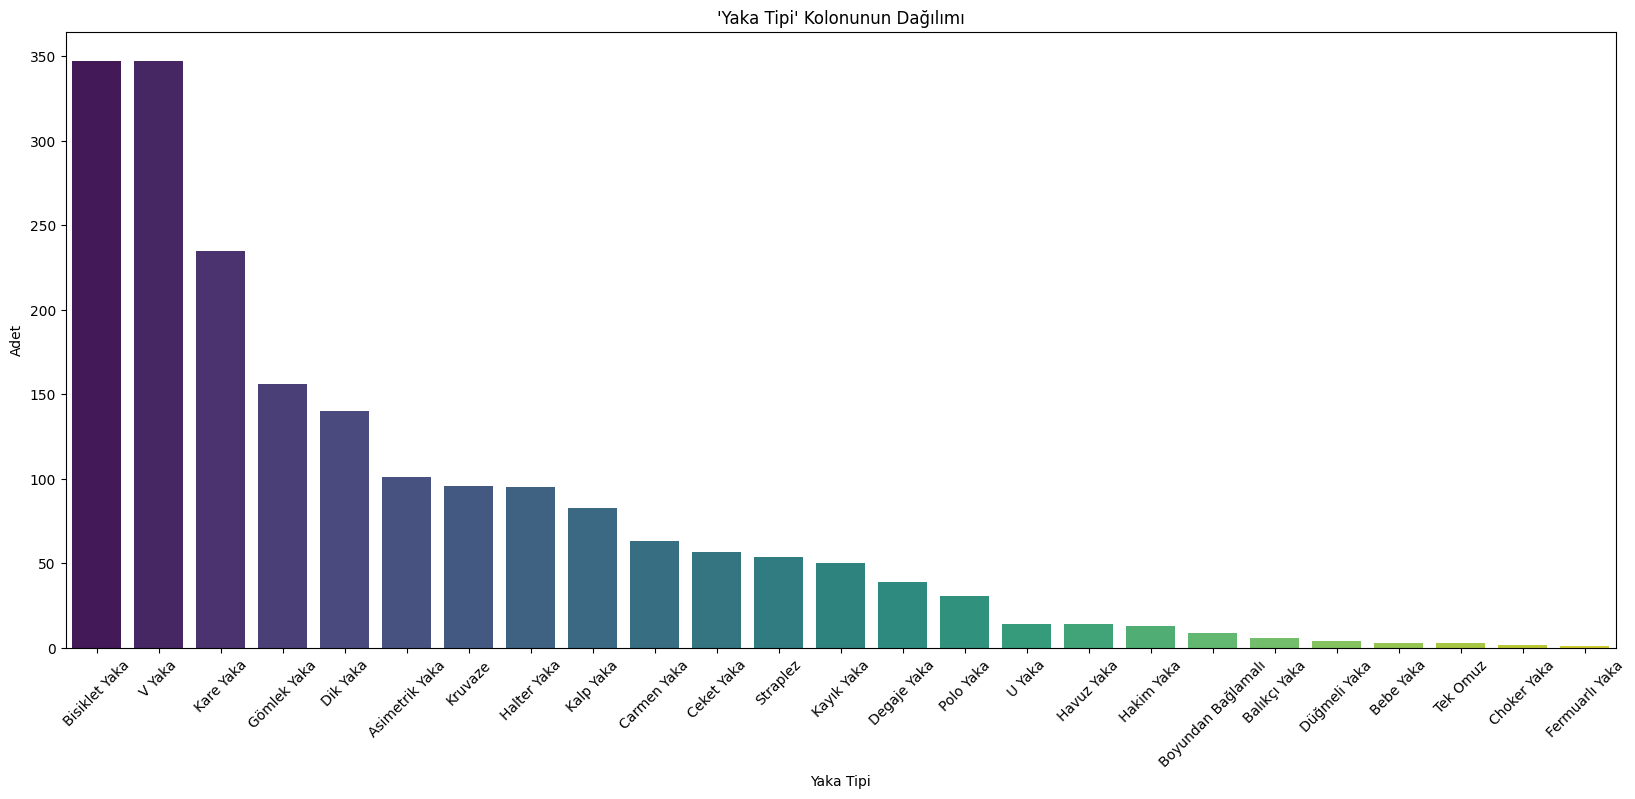

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


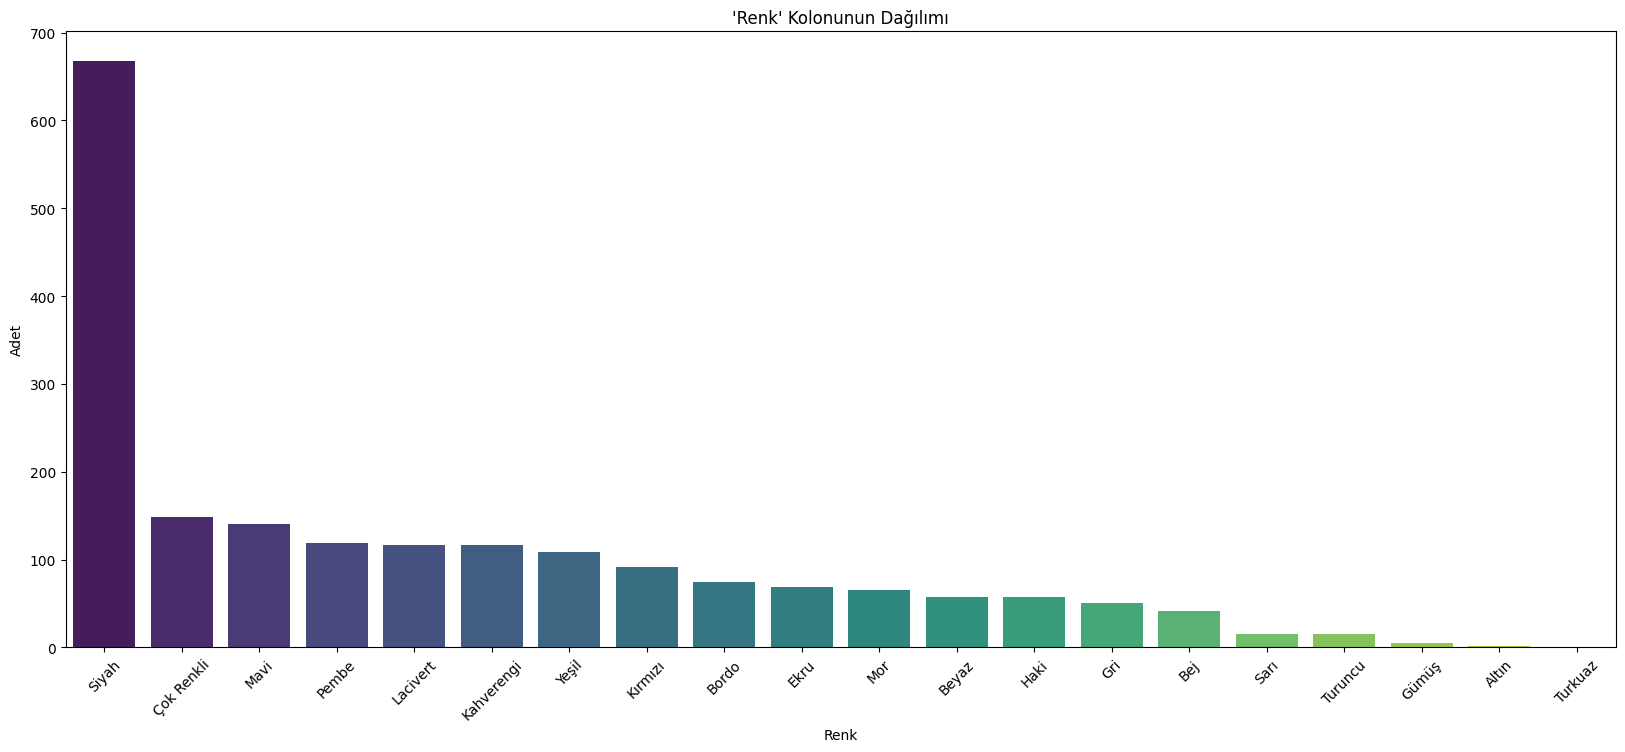

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


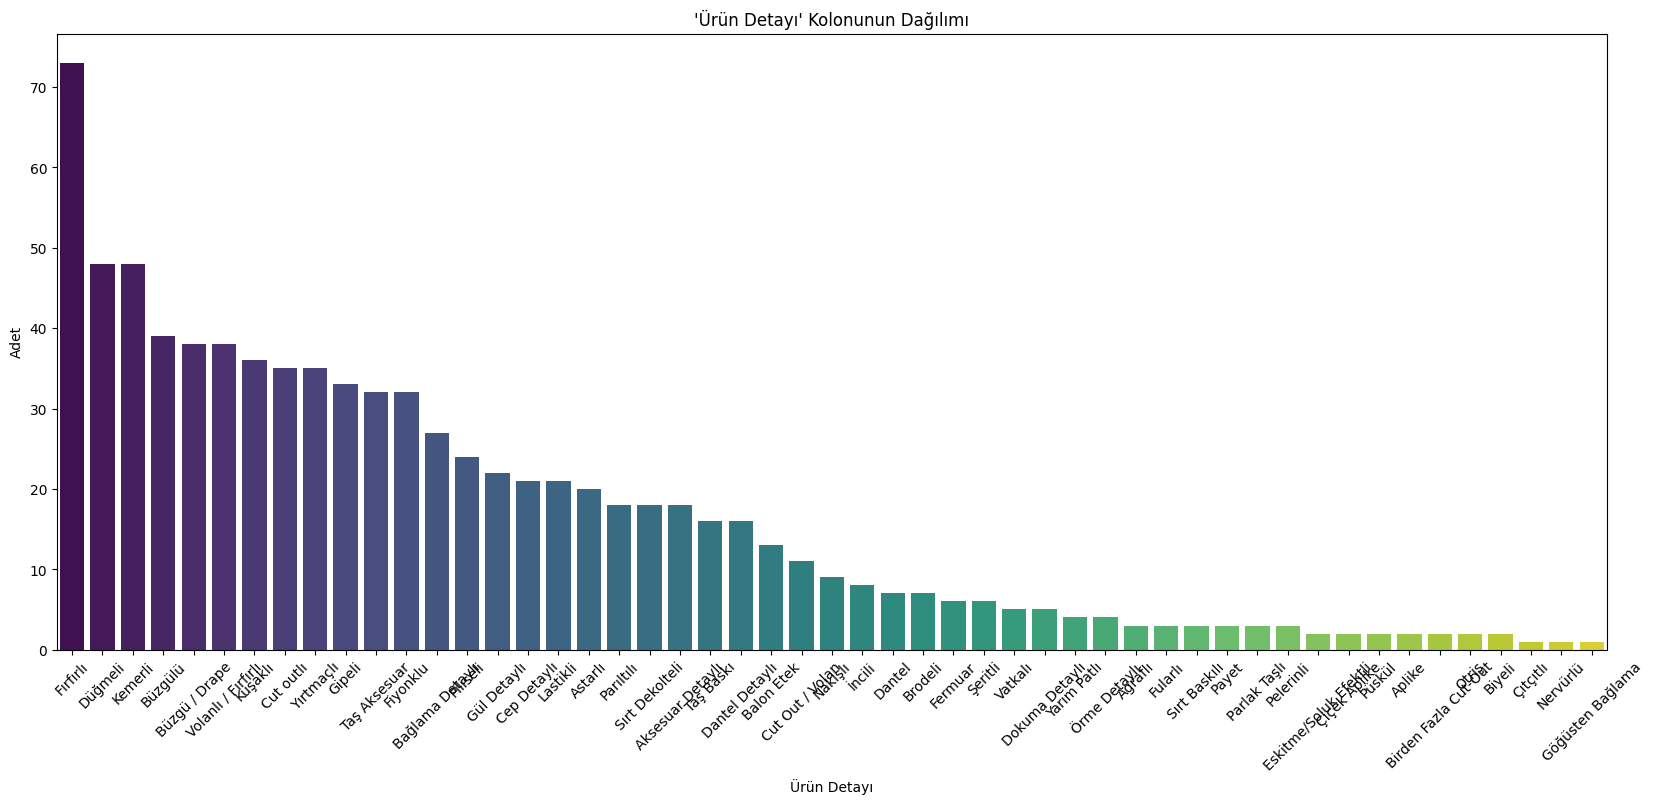

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


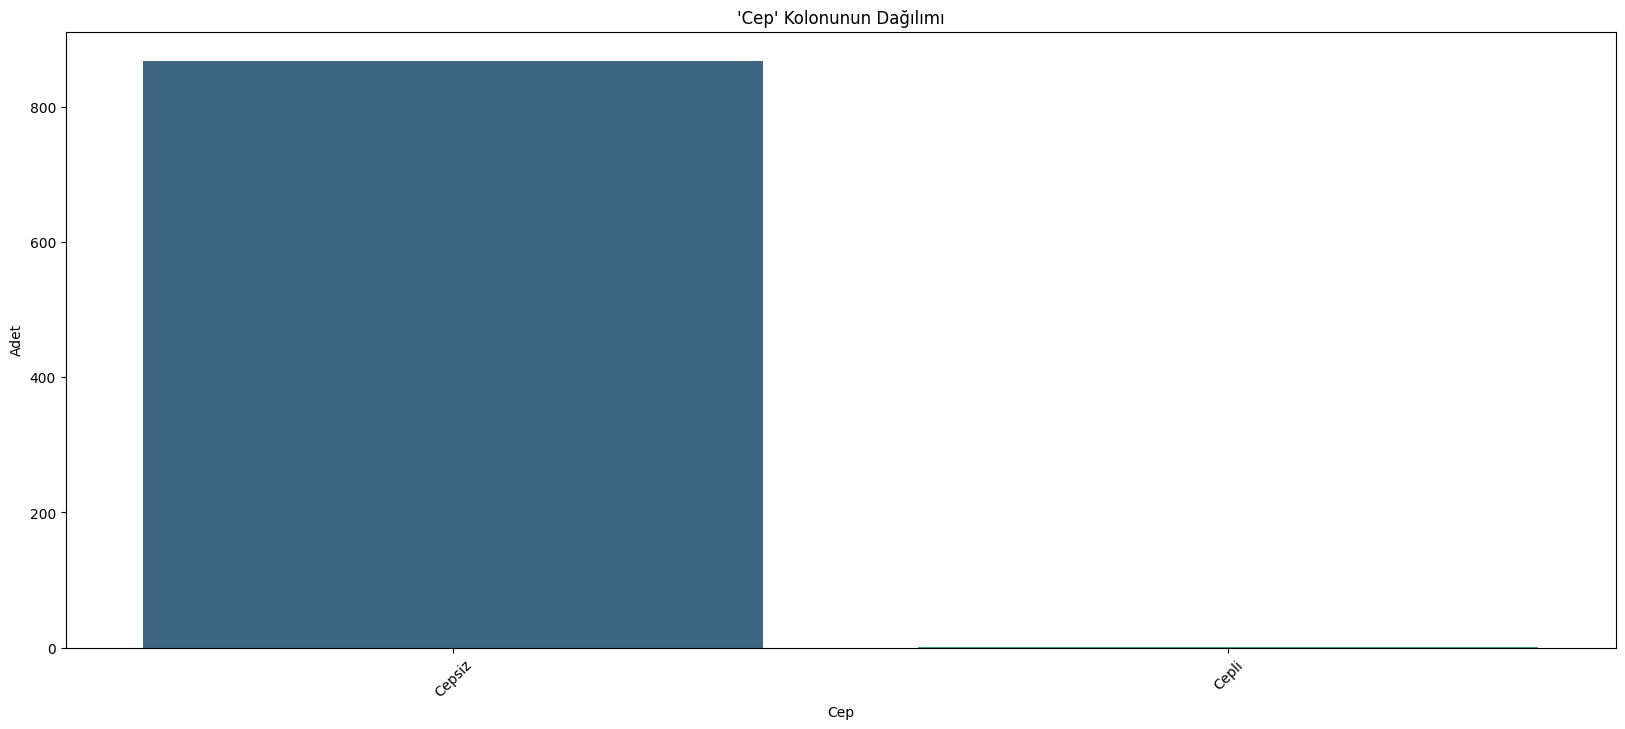

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


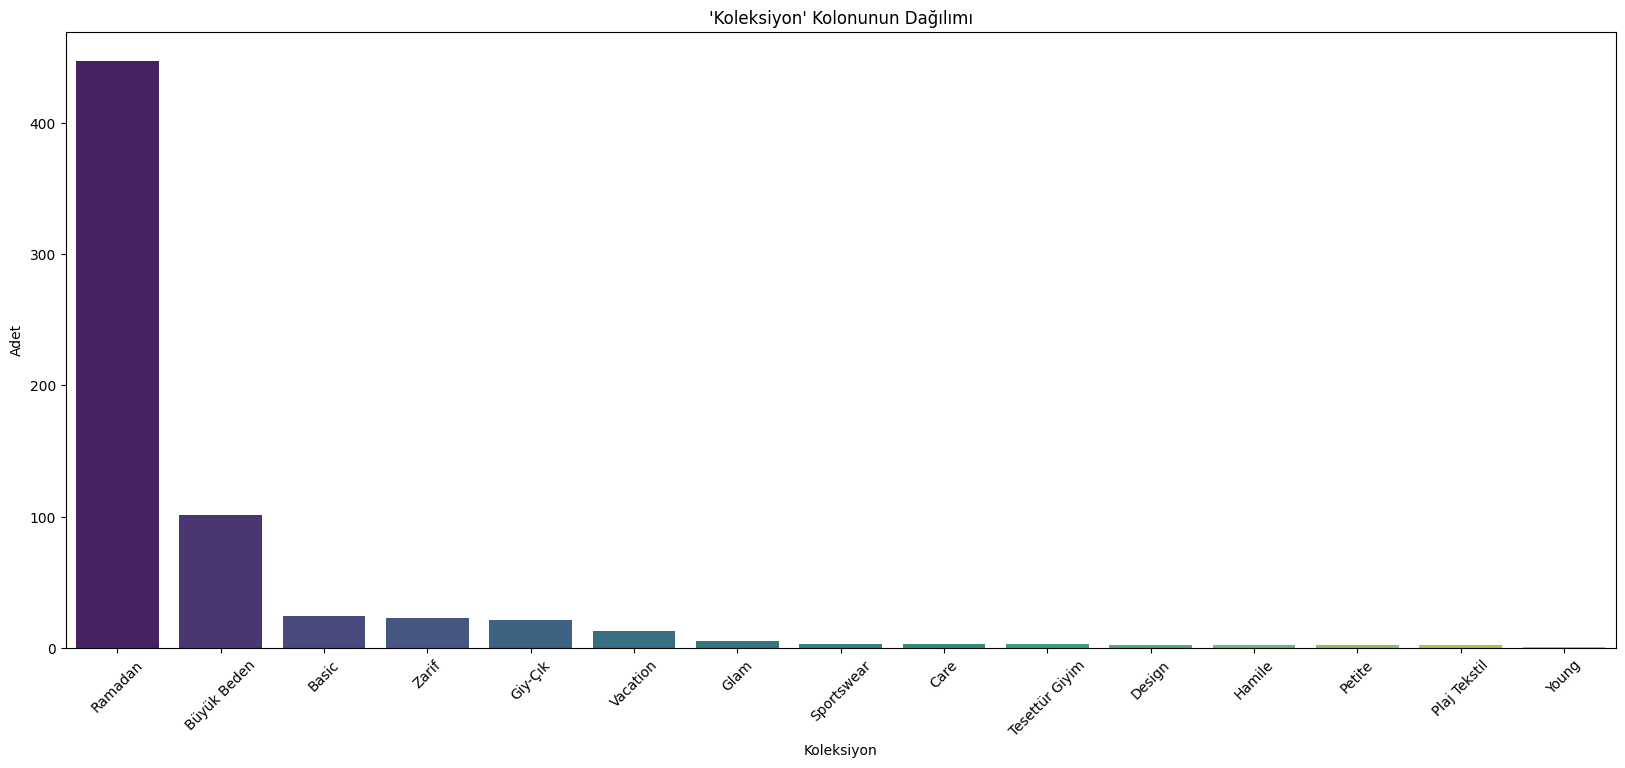

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


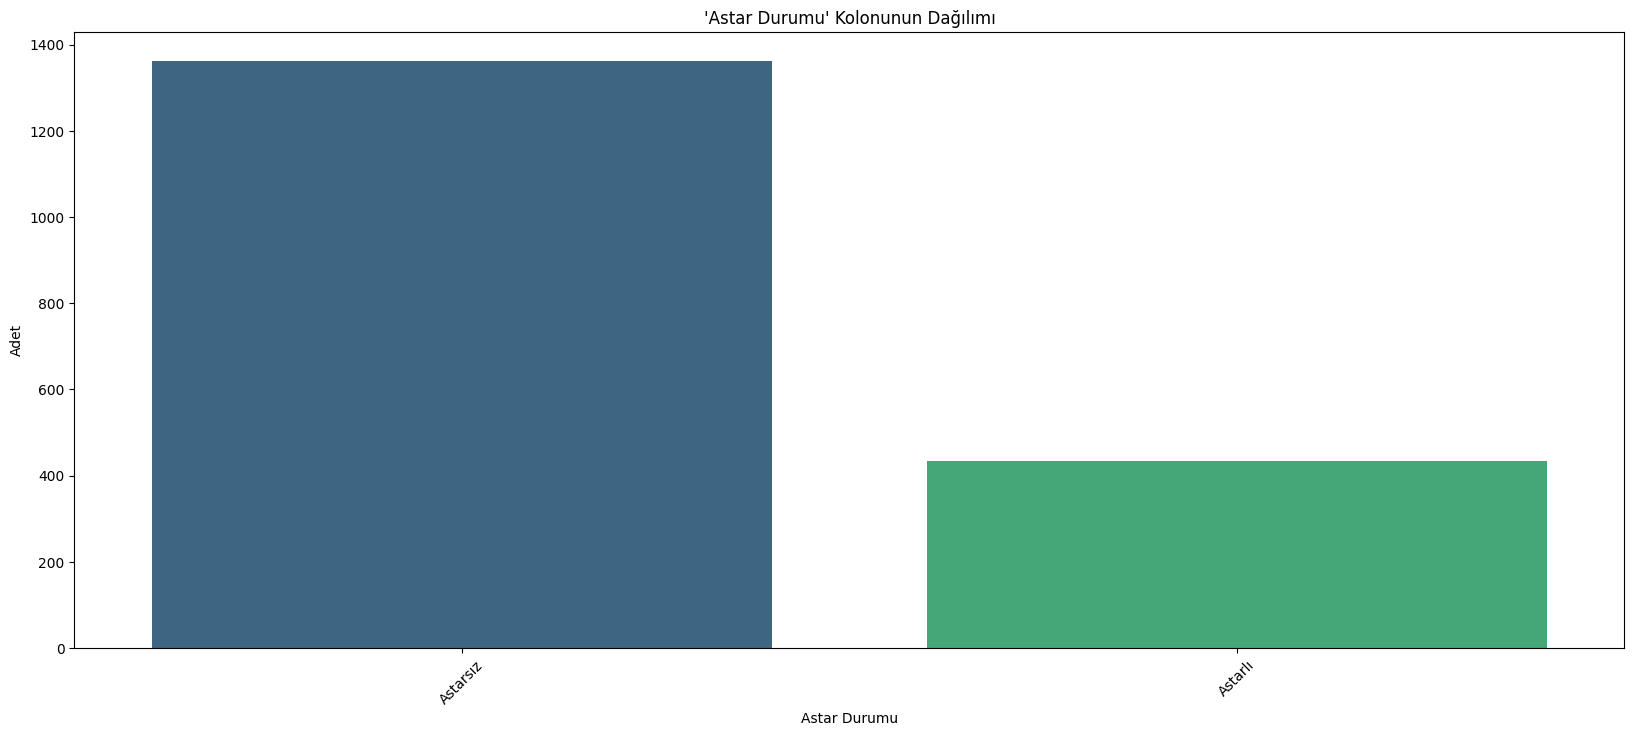

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


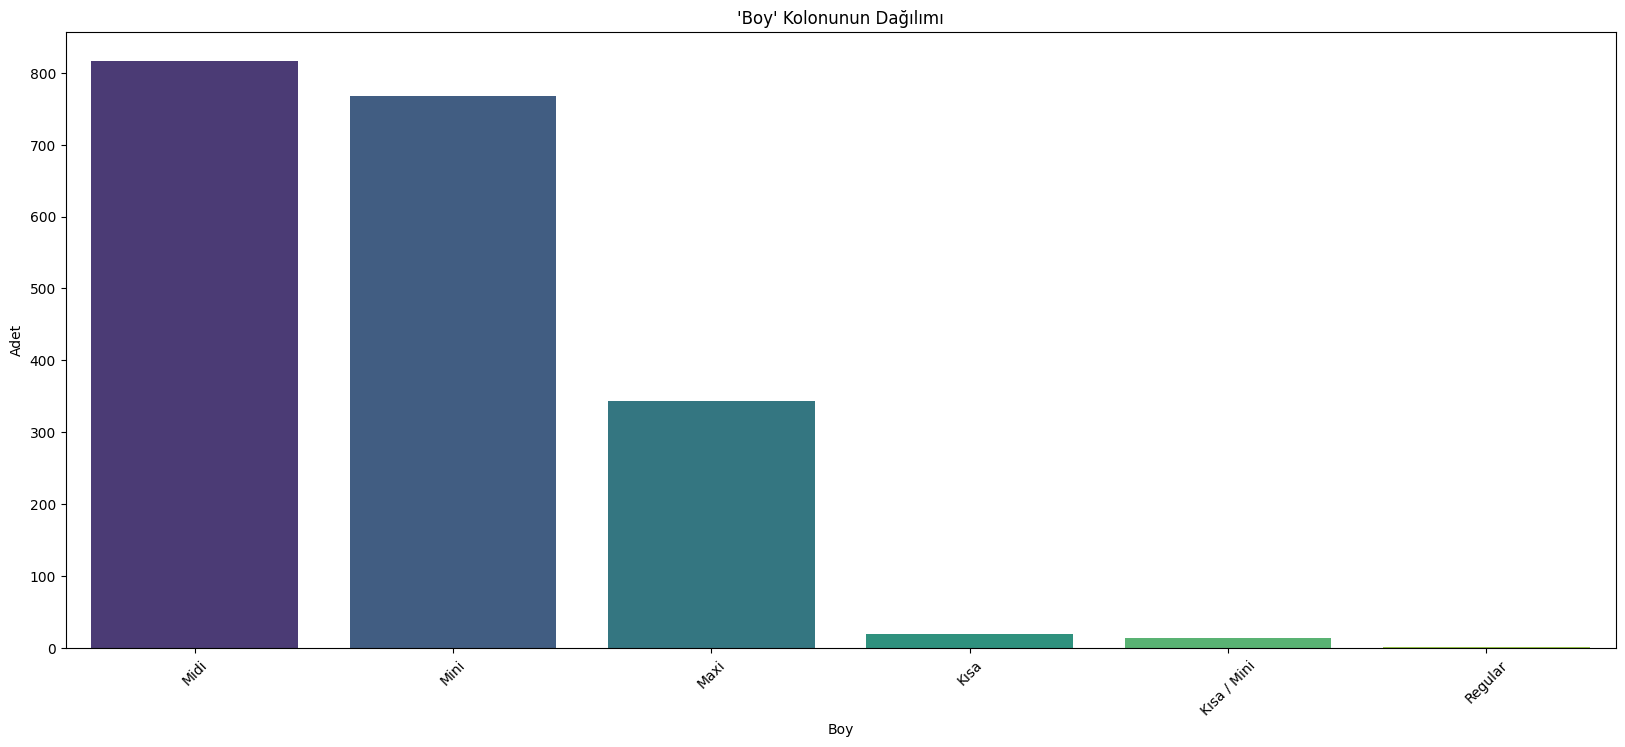

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


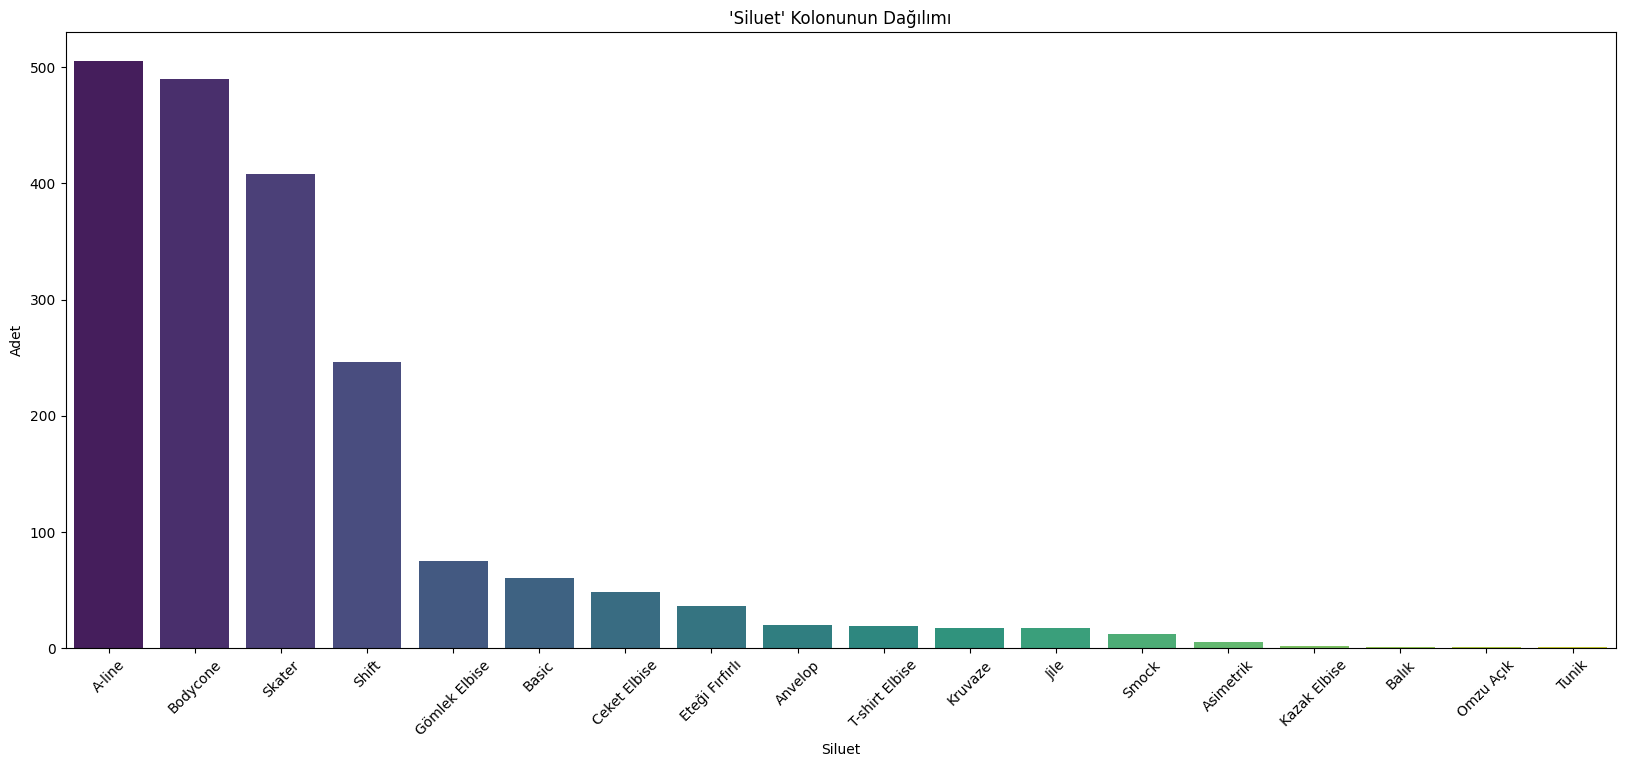

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


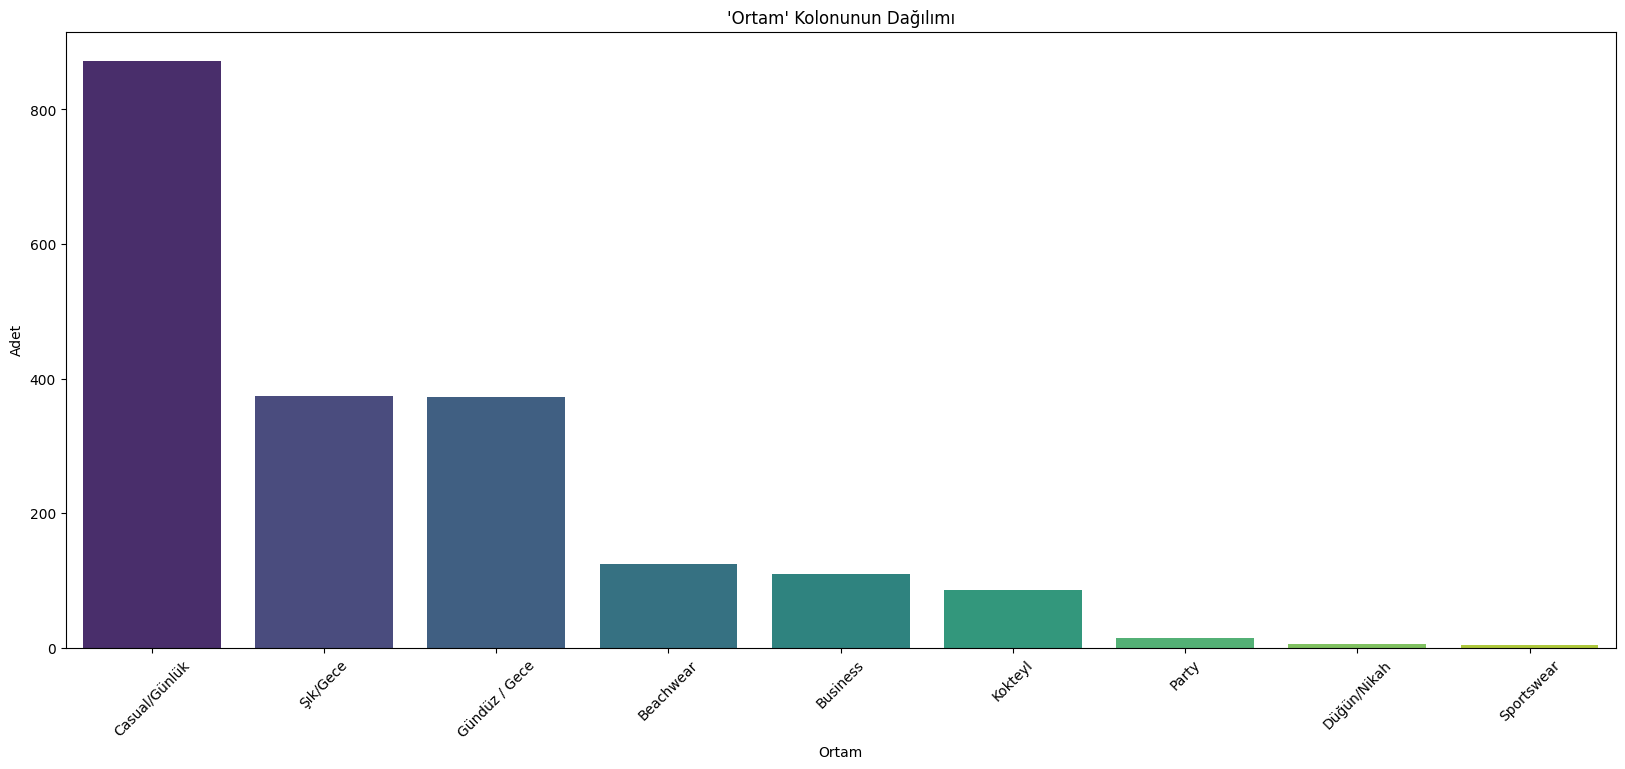

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


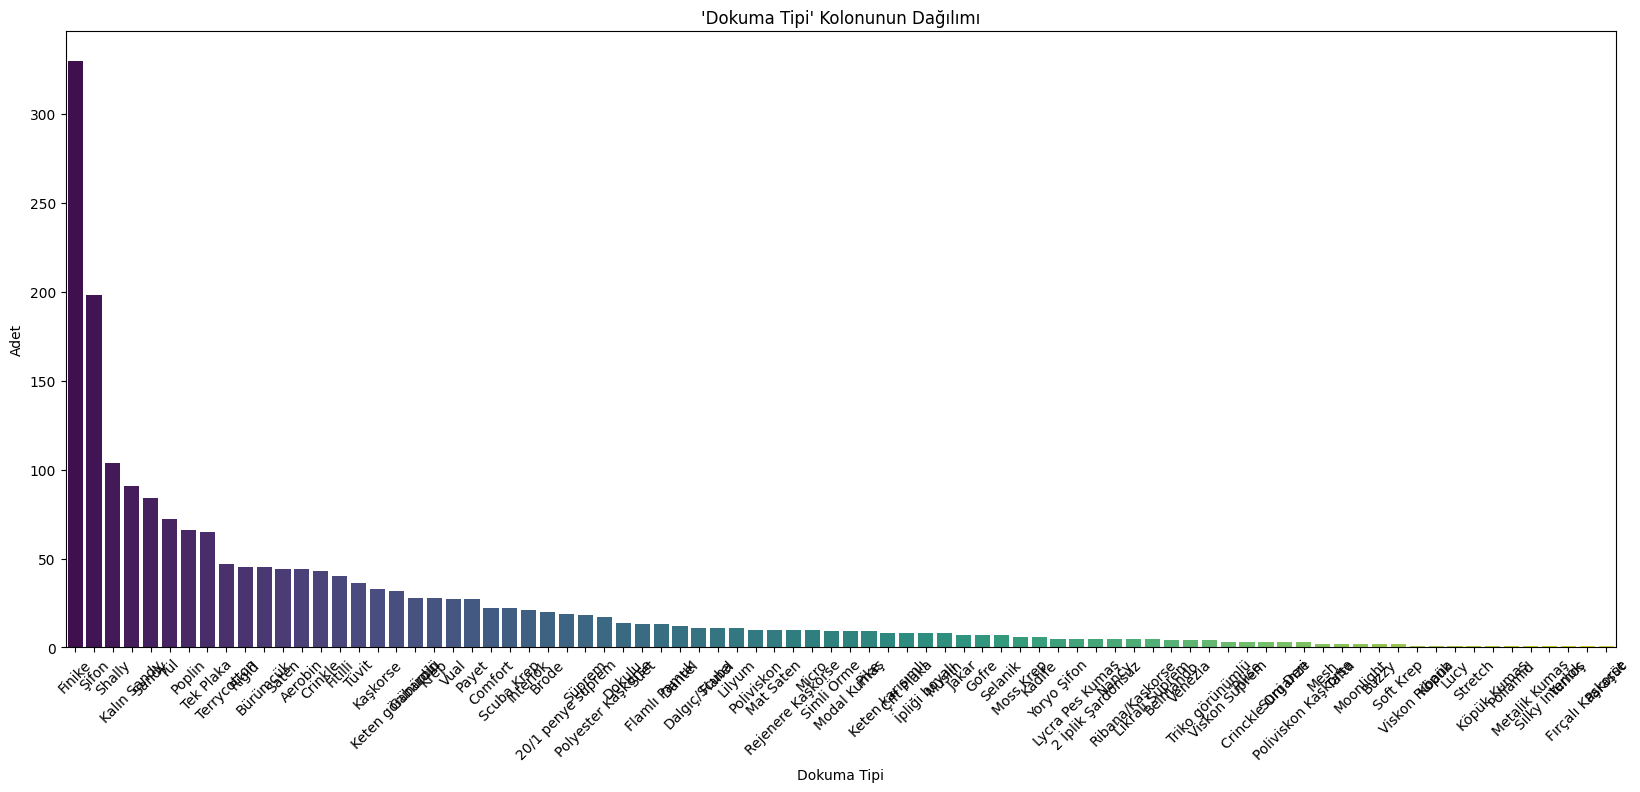

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


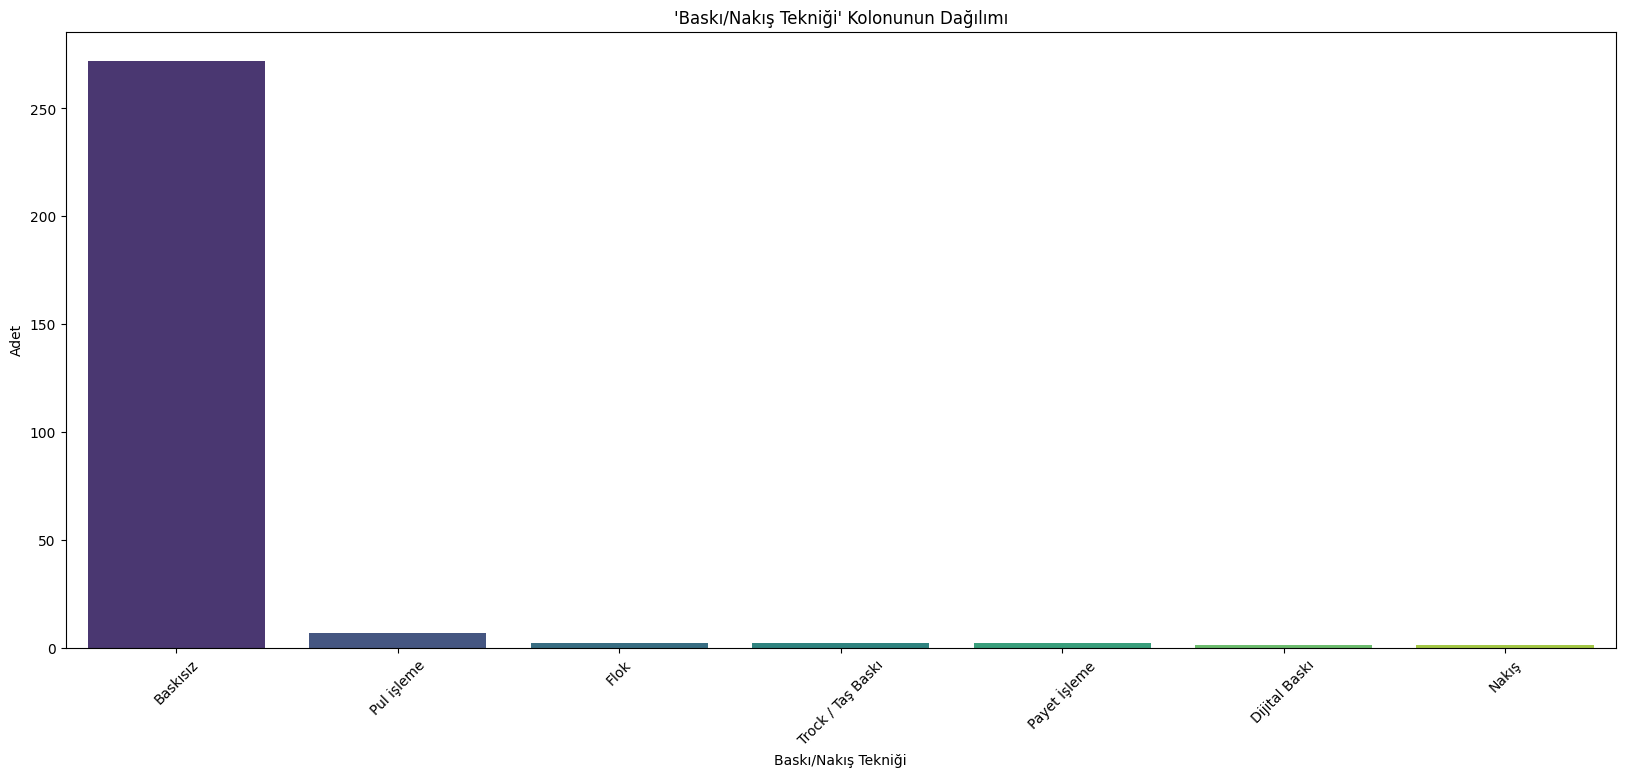

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


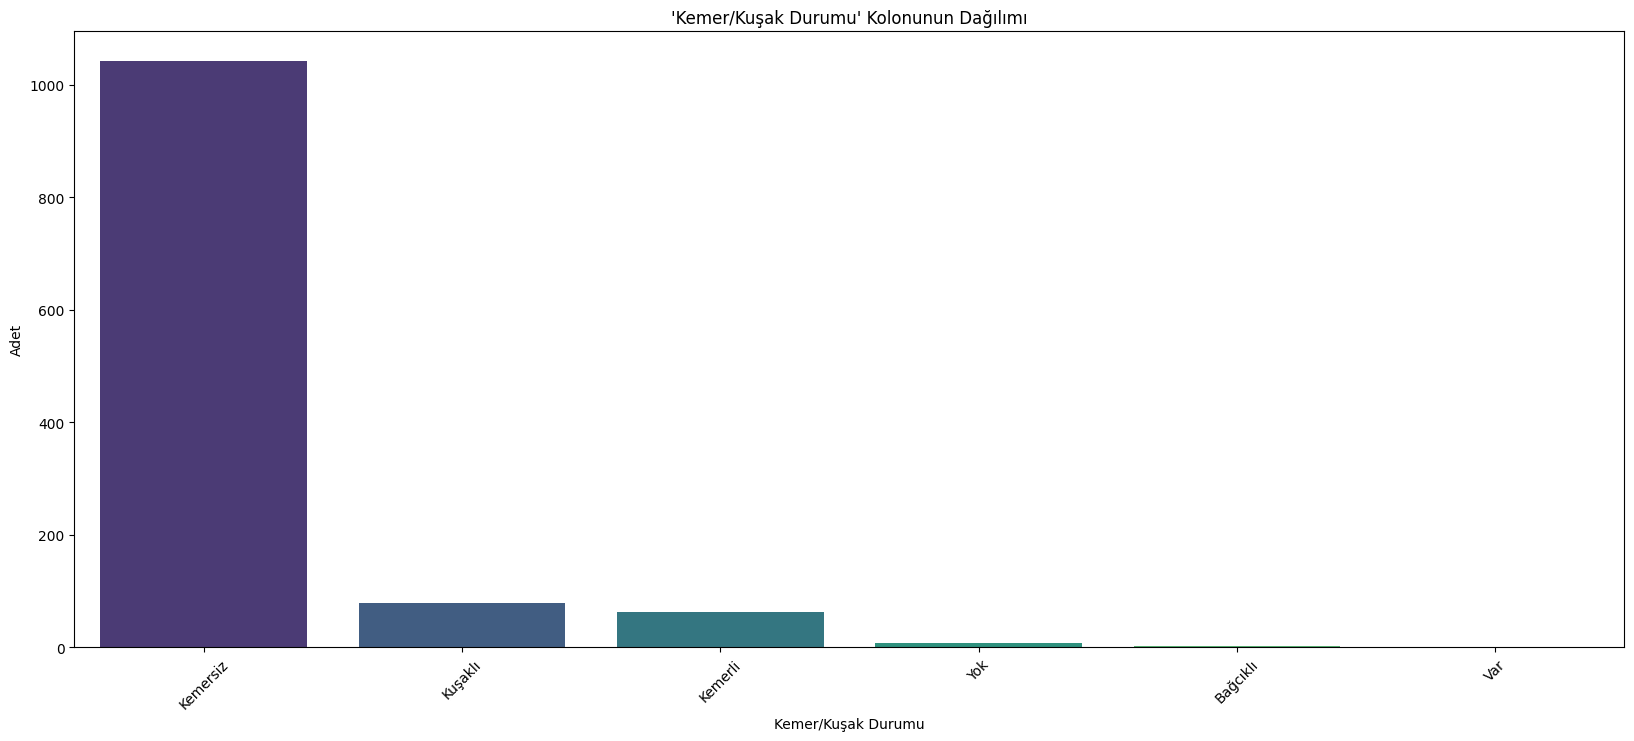

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


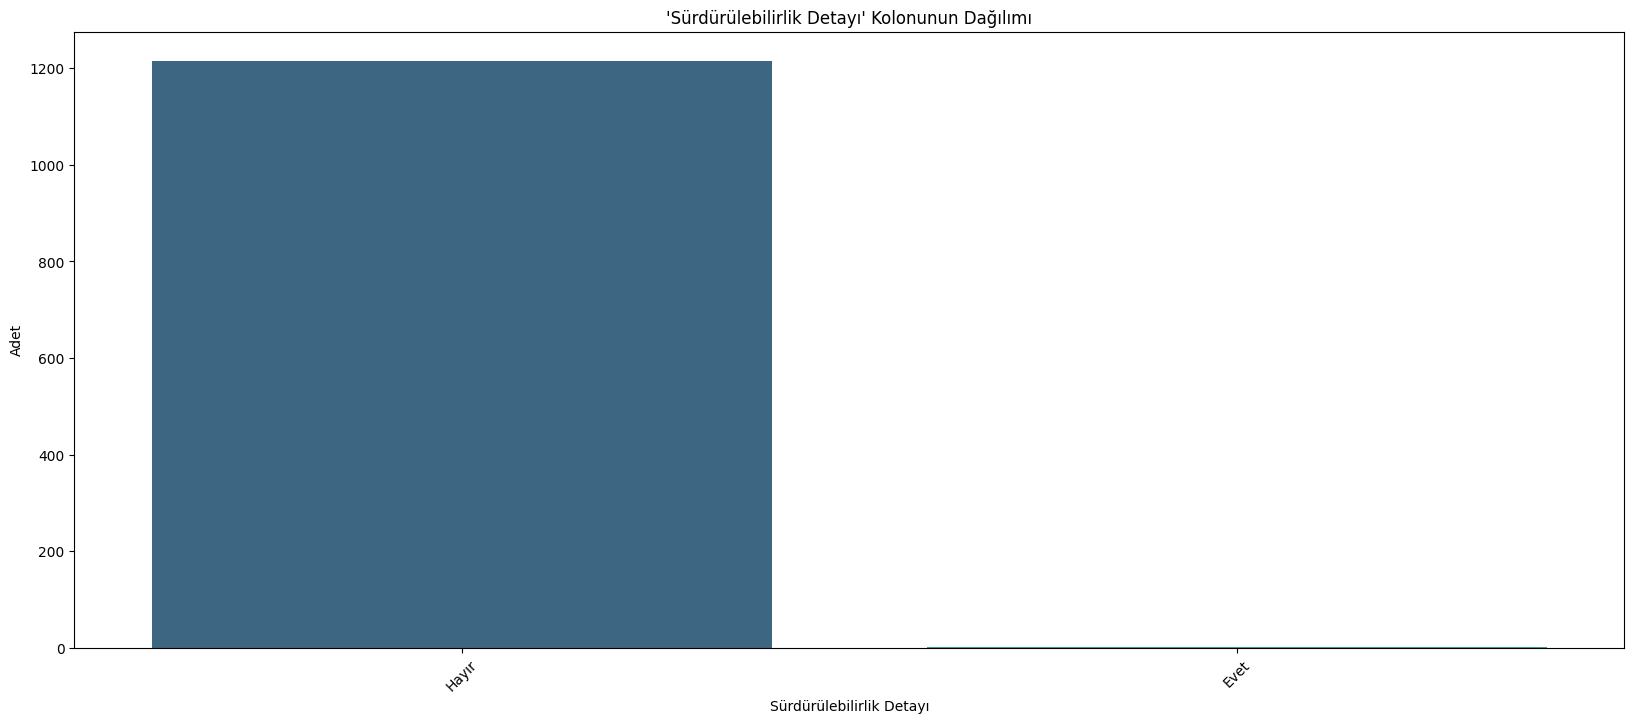

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


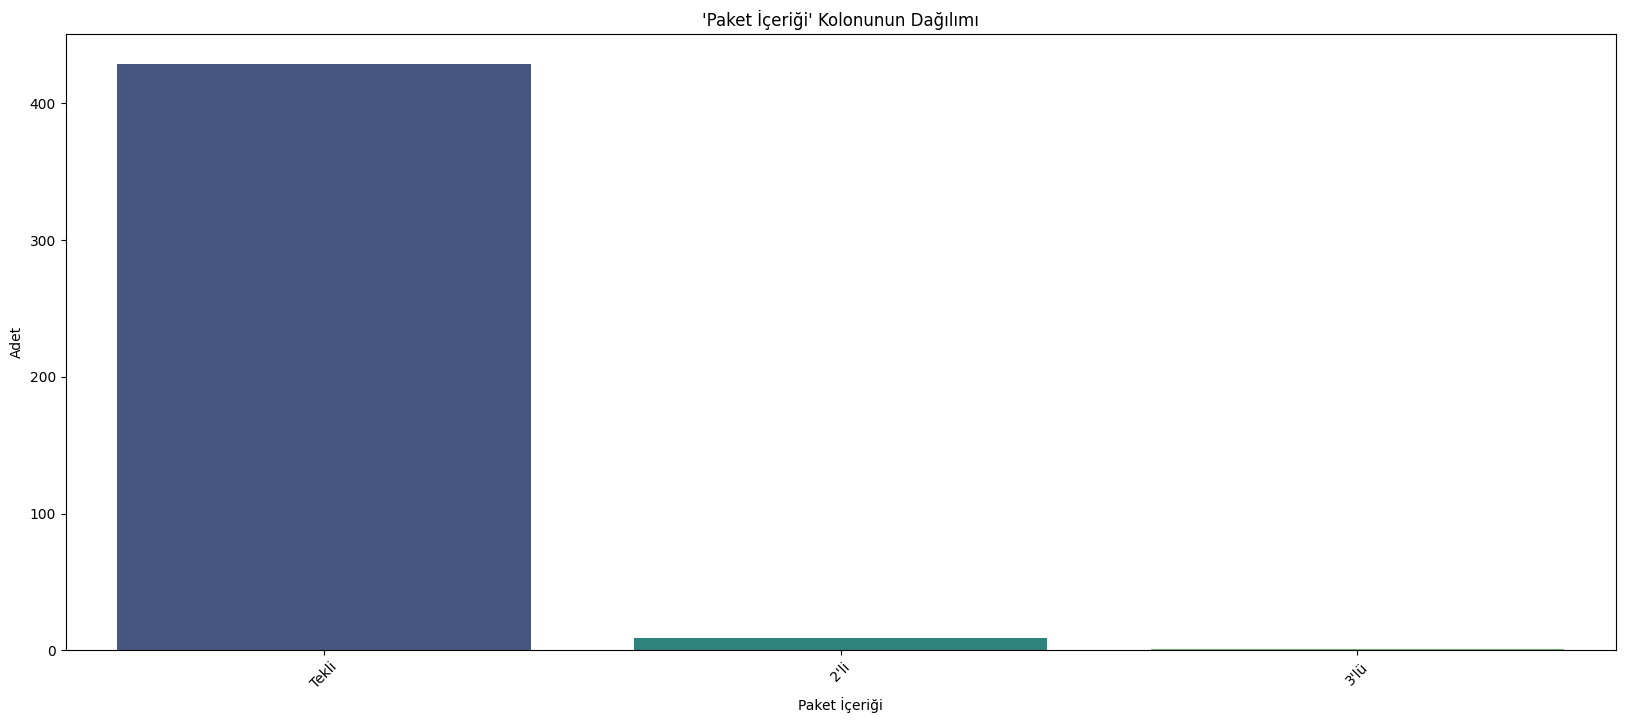

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


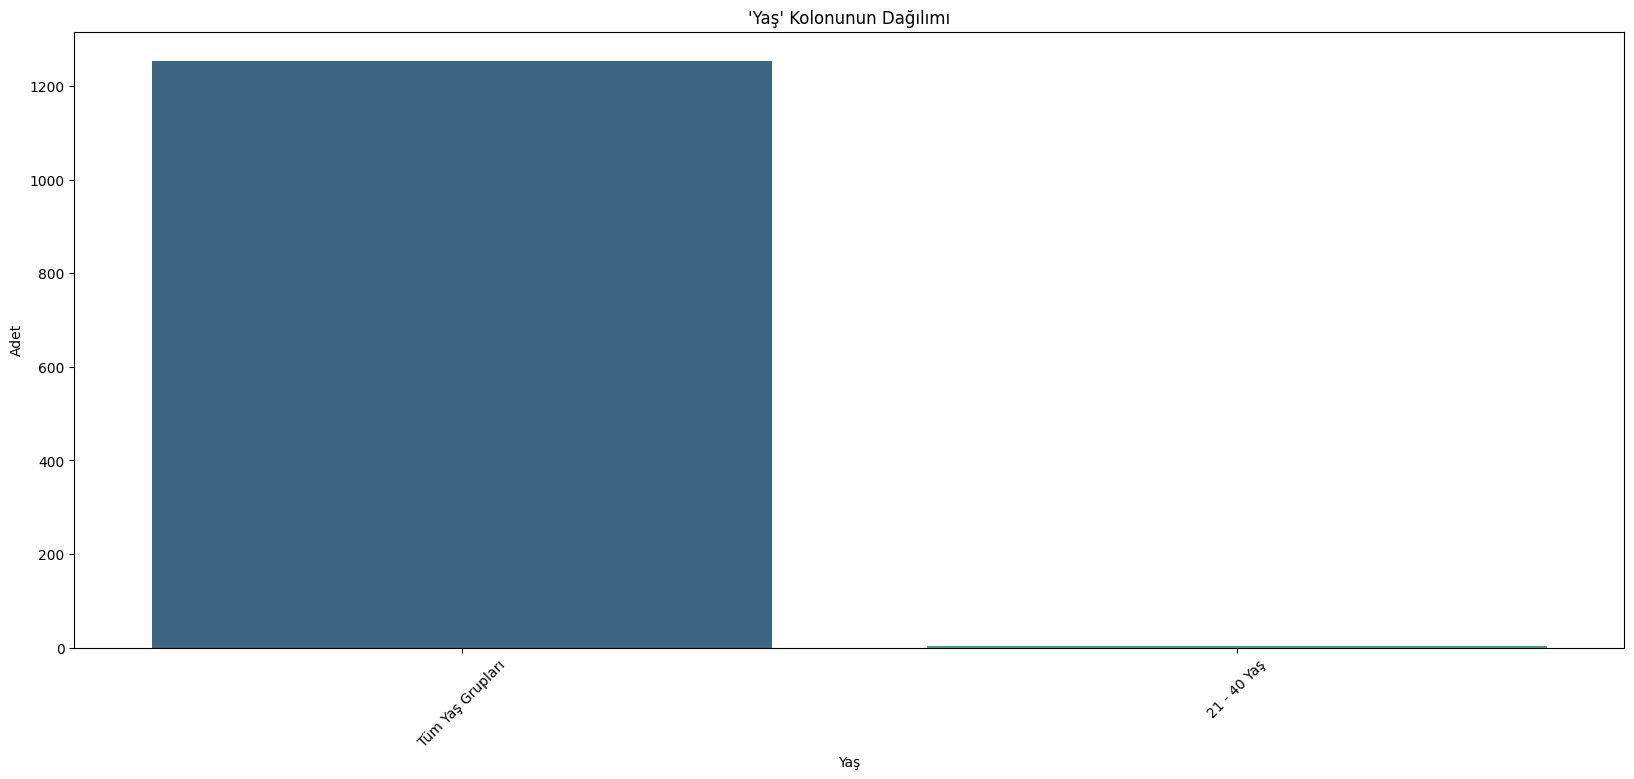

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


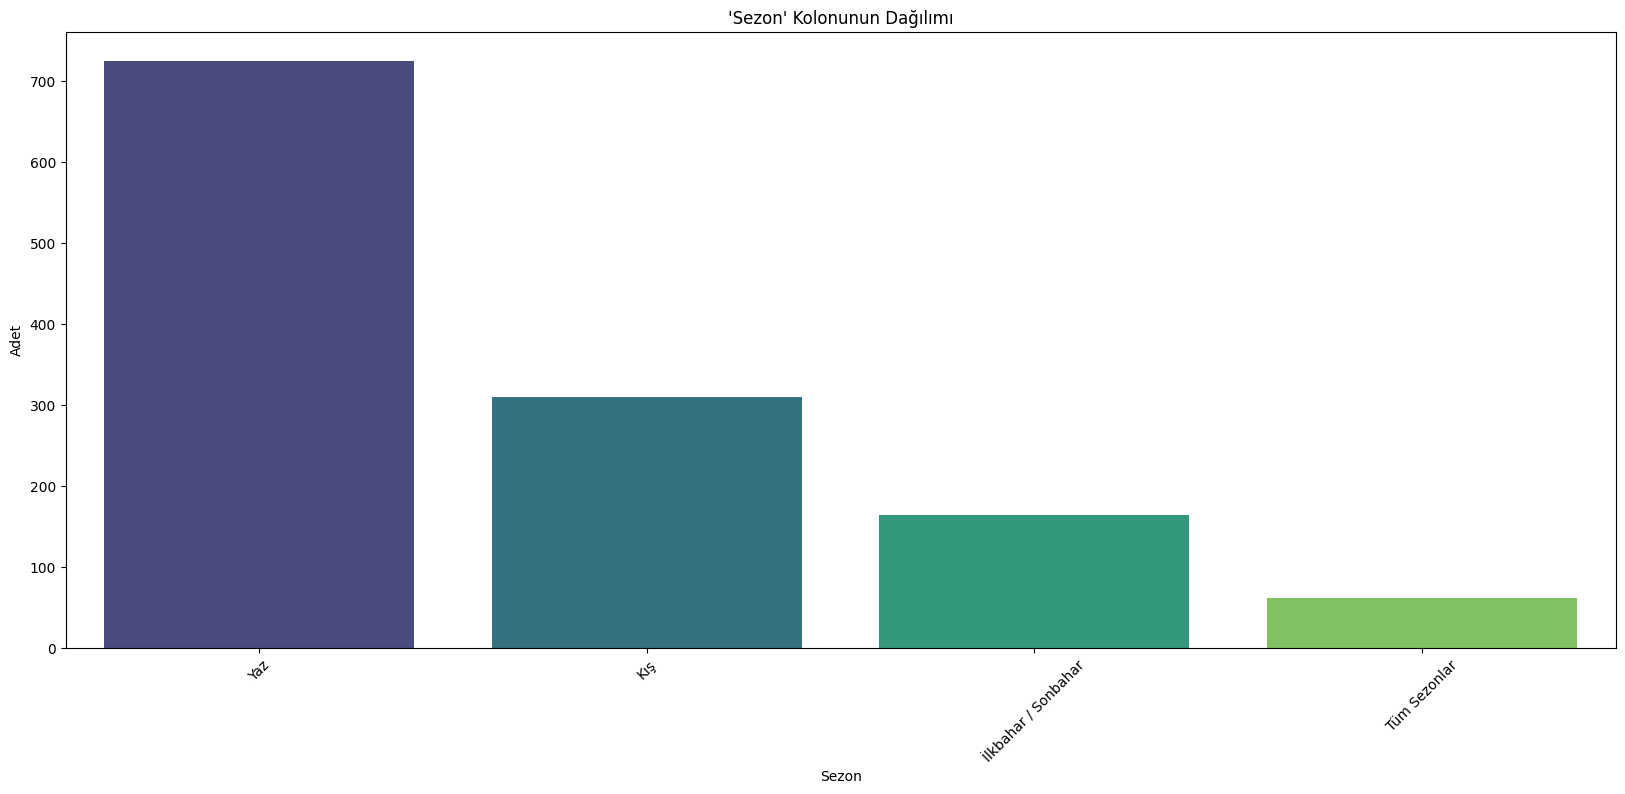

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


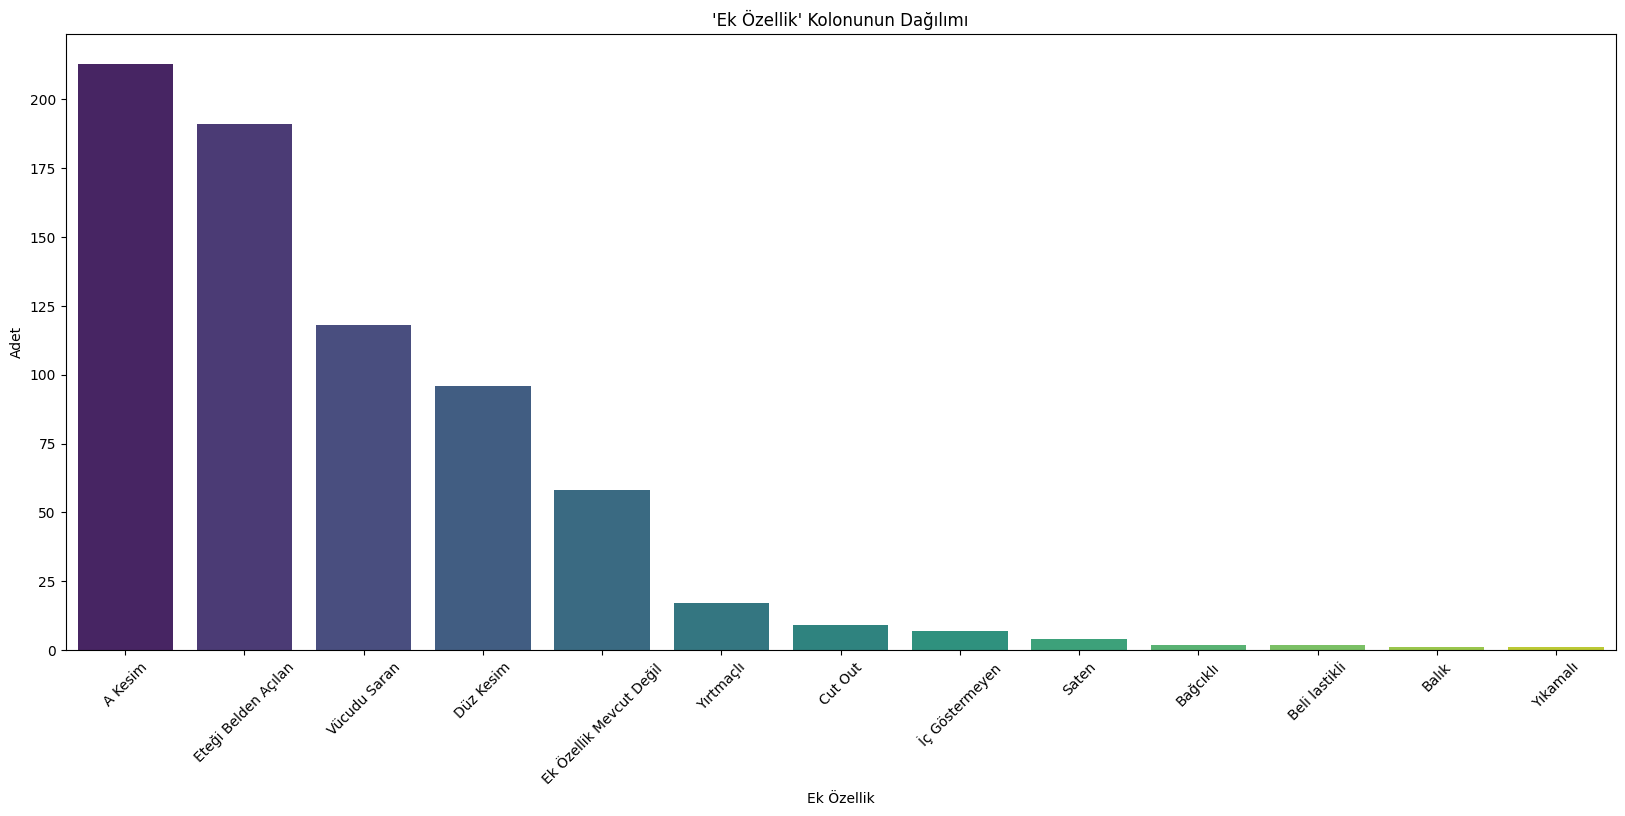

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


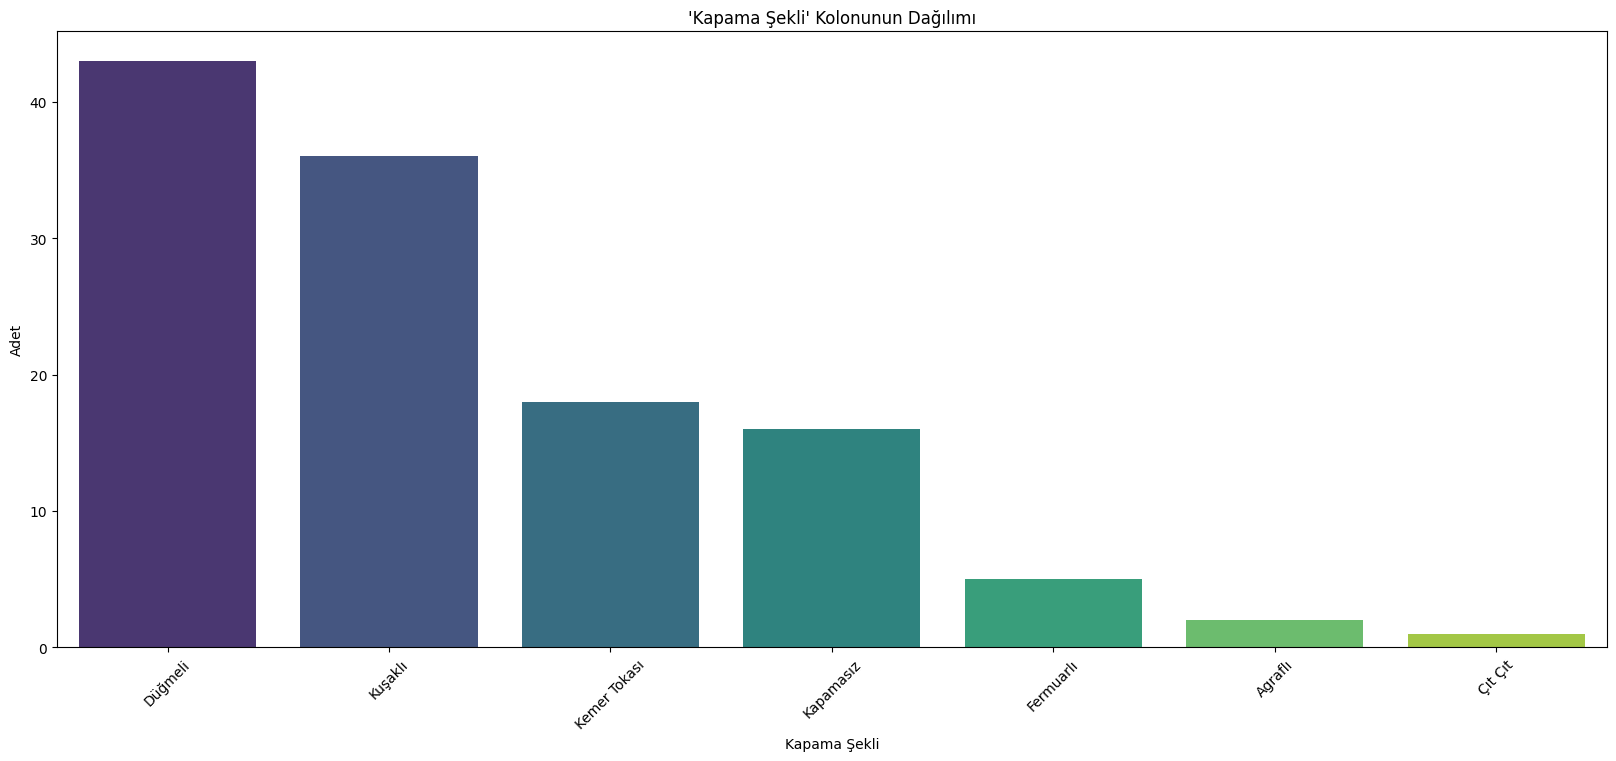

C:\Users\SILA\AppData\Local\Temp\ipykernel_2584\2207604135.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)


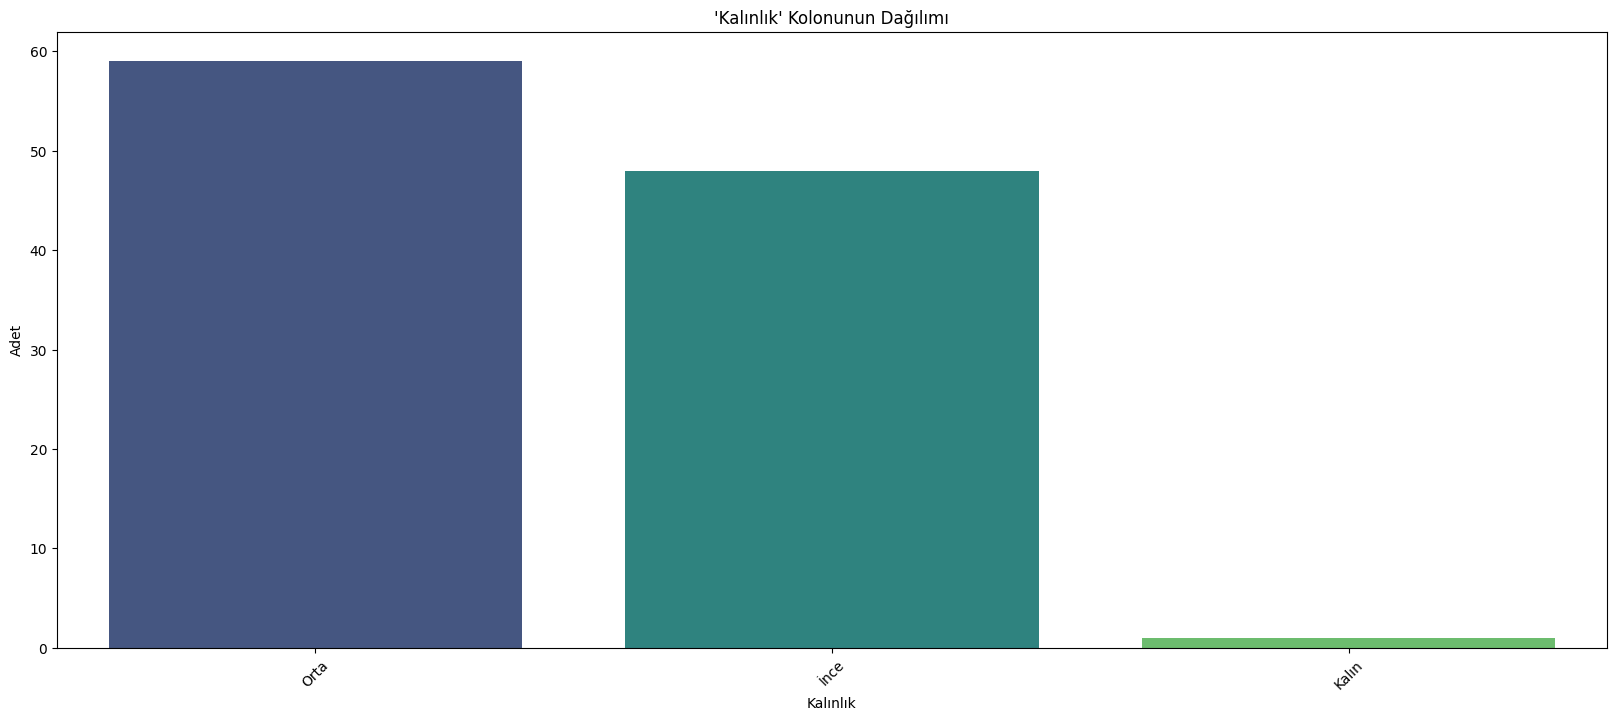

In [ ]:
valid_columns = unique_df[unique_df["Unique Değer Sayısı"] > 1].index.tolist()

valid_columns = [col for col in valid_columns if col != "Ürün Adı"]

for col in valid_columns:
    plt.figure(figsize=(20, 8))  
    sns.countplot(data=df_products, x=col, palette="viridis", order=df_products[col].value_counts().index)
    plt.title(f"'{col}' Kolonunun Dağılımı")
    plt.xticks(rotation=45)  
    plt.xlabel(col)
    plt.ylabel("Adet")
    plt.show()


In [ ]:
df_products = df_products.drop(columns=["Menşei", "Üretici Bilgisi", "Kap"])

In [ ]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1963 entries, 0 to 1962
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Ürün Adı                  1963 non-null   object
 1   Kumaş Tipi                1963 non-null   object
 2   Materyal                  1144 non-null   object
 3   Kalıp                     1963 non-null   object
 4   Kol Boyu                  1963 non-null   object
 5   Persona                   1963 non-null   object
 6   Kol Tipi                  1963 non-null   object
 7   Desen                     1963 non-null   object
 8   Yaka Tipi                 1963 non-null   object
 9   Renk                      1963 non-null   object
 10  Ürün Detayı               828 non-null    object
 11  Cep                       869 non-null    object
 12  Koleksiyon                652 non-null    object
 13  Astar Durumu              1795 non-null   object
 14  Boy                     

In [ ]:
df_products["NaN Sayısı"] = df_products.isna().sum(axis=1)

df_nan_sorted = df_products.sort_values(by="NaN Sayısı", ascending=False)

df_nan_sorted.head(10)

,Ürün Adı,Kumaş Tipi,Materyal,Kalıp,Kol Boyu,Persona,Kol Tipi,Desen,Yaka Tipi,Renk,Ürün Detayı,Cep,Koleksiyon,Astar Durumu,Boy,Siluet,Ortam,Dokuma Tipi,Baskı/Nakış Tekniği,Kemer/Kuşak Durumu,Sürdürülebilirlik Detayı,Paket İçeriği,Yaş,Sezon,Ek Özellik,Kapama Şekli,Kalınlık,NaN Sayısı
1626,Trendyol Curve Siyah Düz Midi Yaka Detaylı Krep Esnek Örme Elbise TBBSS25AH00129,Örme,NaN,Relaxed,Kolsuz,Feminine,Standart Kol,Düz,Dik Yaka,Siyah,NaN,NaN,NaN,NaN,Mini,A-line,Casual/Günlük,Krep,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1624,Trendyol Curve Siyah Şifon Fırfırlı Midi Dokuma Büyük Beden Elbise TBBSS25AH00162,Dokuma,NaN,Relaxed,Kısa,Feminine,Düşük Kol,Çiçekli,Asimetrik Yaka,Siyah,NaN,NaN,NaN,NaN,Maxi,Asimetrik,Şık/Gece,Şifon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1613,Trendyol Curve Mavi Çiçek Baskılı Örme Tül Büyük Beden Elbise TBBSS25AH00117,Örme,NaN,Slim,Kolsuz,Cool & Comfort,Standart Kol,Çiçekli,Bisiklet Yaka,Çok Renkli,NaN,NaN,NaN,NaN,Midi,Shift,Casual/Günlük,Tül,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1608,Trendyol Curve Bordo Boyundan Bağlamalı A-line Örme Büyük Beden Elbise TBBSS25AH00177,Örme,NaN,Fitted,Kolsuz,Cool & Comfort,Standart Kol,Düz,Boyundan Bağlamalı,Bordo,NaN,NaN,NaN,NaN,Maxi,A-line,Casual/Günlük,Sandy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
540,Trendyol Curve Yağ Yeşil Dökümlü Rahat Modal Süprem Örme Büyük Beden Elbise TBBSS25AH00138,Örme,NaN,Relaxed,Kolsuz,Cool & Comfort,Standart Kol,Düz,Bisiklet Yaka,Yeşil,NaN,NaN,NaN,NaN,Mini,Eteği Fırfırlı,Casual/Günlük,Süprem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
559,Trendyol Curve Mürdüm Kayık Yaka A-line Kaşkorse Örme Büyük Beden Elbise TBBSS25AH00196,Örme,NaN,Slim,Kolsuz,Cool & Comfort,Standart Kol,Düz,U Yaka,Mor,NaN,NaN,NaN,NaN,Mini,A-line,Casual/Günlük,Kaşkorse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1602,Trendyol Curve Çok Renkli Çiçekli Şifon Fırfırlı Midi Dokuma Büyük Beden Elbise TBBSS25AH00162,Dokuma,NaN,Relaxed,Kısa,Feminine,Düşük Kol,Çiçekli,Asimetrik Yaka,Çok Renkli,NaN,NaN,NaN,NaN,Maxi,Asimetrik,Şık/Gece,Şifon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1601,Trendyol Curve Mor Şifon Maxi Fırfırlı Boyundan Bağlamalı Dokuma Büyük Beden Elbise TBBSS25AH00170,Dokuma,NaN,Relaxed,Kolsuz,Feminine,Standart Kol,Düz,Halter Yaka,Mor,NaN,NaN,NaN,NaN,Maxi,A-line,Party,Şifon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1600,Trendyol Curve Gri Keten Görünümlü Kolsuz Mini Dokuma Büyük Beden Ceket Elbise TBBSS25AH00166,Dokuma,NaN,Fitted,Kolsuz,Smart/Office,Standart Kol,Düz,Ceket Yaka,Gri,NaN,NaN,NaN,NaN,Mini,Ceket Elbise,Business,Keten görünümlü,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14
1599,Trendyol Curve Antrasit Dökümlü Rahat Modal Süprem Örme Büyük Beden Elbise TBBSS25AH00138,Örme,NaN,Relaxed,Kolsuz,Cool & Comfort,Standart Kol,Düz,Bisiklet Yaka,Gri,NaN,NaN,NaN,NaN,Mini,Eteği Fırfırlı,Casual/Günlük,Süprem,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14


In [ ]:
df_products = df_products.drop(columns=["NaN Sayısı"])
df_products.tail()

,Ürün Adı,Kumaş Tipi,Materyal,Kalıp,Kol Boyu,Persona,Kol Tipi,Desen,Yaka Tipi,Renk,Ürün Detayı,Cep,Koleksiyon,Astar Durumu,Boy,Siluet,Ortam,Dokuma Tipi,Baskı/Nakış Tekniği,Kemer/Kuşak Durumu,Sürdürülebilirlik Detayı,Paket İçeriği,Yaş,Sezon,Ek Özellik,Kapama Şekli,Kalınlık
1958,TRENDYOLMİLLA Siyah A-Kesim Straplez Dokuma Kısa Şık Elbise TPRSS25EL00008,Dokuma,NaN,Fitted,Kolsuz,Feminine,Standart Kol,Düz,Straplez,Siyah,NaN,NaN,NaN,Astarsız,Mini,A-line,Şık/Gece,Finike,NaN,NaN,NaN,NaN,NaN,NaN,A Kesim,NaN,NaN
1959,TRENDYOLMİLLA Mavi Çiçek Desenli Eteği Belden Açılan Fırfır Detaylı Mini Dokuma Elbise TWOSS25EL00423,Dokuma,NaN,Regular,Kolsuz,Feminine,Büzgülü/Fırfırlı Kol,Çiçekli,V Yaka,Mavi,Lastikli,NaN,NaN,Astarlı,Mini,Skater,Casual/Günlük,Şifon,NaN,NaN,NaN,NaN,NaN,NaN,Eteği Belden Açılan,NaN,NaN
1960,Trendyol Curve Siyah Düğme Detaylı Yırtmaçlı Fitted/Vücuda Oturan Midi Dokuma Elbise TBBSS24AH00214,Dokuma,Polyester Karışımlı,Oversize,Uzun,Smart/Office,Standart Kol,Düz,Degaje Yaka,Siyah,NaN,Cepsiz,NaN,Astarsız,Midi,Kruvaze,Casual/Günlük,Finike,NaN,Kemersiz,Hayır,NaN,Tüm Yaş Grupları,NaN,NaN,NaN,NaN
1961,Trendyol Curve Pembe Çiçek Desenli A-line Örme Büyük Beden Elbise TBBSS25AH00127,Örme,NaN,Slim,Kısa,Cool & Comfort,Balon Kol,Çiçekli,V Yaka,Pembe,NaN,NaN,NaN,NaN,Mini,A-line,Casual/Günlük,Bürümcük,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1962,TRENDYOLMİLLA Siyah Vücuda Oturan Payet Detaylı Dokuma Mini Şık Elbise TPRSS25EL00204,Dokuma,NaN,Fitted,Kolsuz,Fashion Forward,Standart Kol,Düz,V Yaka,Siyah,NaN,NaN,NaN,Astarsız,Mini,Bodycone,Şık/Gece,Finike,NaN,NaN,NaN,NaN,NaN,NaN,Vücudu Saran,NaN,NaN


In [ ]:
comment_path = os.path.join(os.path.expanduser("~"), "Desktop\\TrendyolMilla\\02_Data_Cleaning\\Data")
file_name = "products_cleaned.csv"
file_path = os.path.join(comment_path, file_name)
df_products.to_csv(file_path, index=False)  
print(f"{file_name} olarak kaydedildi.") 

products_cleaned.csv olarak kaydedildi.
